# 0.0. IMPORTS

## 0.1. Libries

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import plotly.express    as px 

import warnings
warnings.filterwarnings('ignore')

## 0.2. Helper Functions

## 0.3. Loading Data

In [2]:
df_raw= pd.read_csv('data/kc_house_data.csv')

# 1. DATA DESCRIPTION

In [3]:
df1 = df_raw.copy()

<b>Data Summary:    

- id: Identificador do imóvel
    
- date: Data que o imóvel ficou disponível
    
- price: O preço de compra do imóvel.
    
- bedrooms: Número de quartos
    
- bathrooms: Número de banheiros. 0,5 indica quarto com banheiro, mas sem chuveiro. 0,75 ou 3/4 indica banheiro com pia, vaso e chuveiro ou banheira; 
    
- sqft_living: Pés quadrados do interior das casas
    
- sqft_lot: Pés quadrados do terreno das casas
    
- floors: Número de andares
    
- waterfront: Possuí vista para o mar. Sendo 1 para sim e 0 não.
    
- view: Visualização, indicando de 1 a 4 quão boa era a visualização.
    
- condition: Condição do imóvel. Vai de 1 a 5, onde 1 indica degradada e 5 excelente
    
- grade: Nota geral. O índice de 1 a 13 quanto a construção e design do edificio. Onde 1-3 esta a baixo, 7 médio, e 11-13 nível alto 
    
- sqft_above: Os pés quadrados do espaço habitacional interior a cima do solo
    
- sqft_basement: Os pés quadrados do espaço habitacional interior a baixo do solo
    
- yr_built: Ano de construção da propriedade
    
- yr_renovated: Representa ano da utlima reforma do imóvel. Onde 0 nunca foram reformadas
    
- zipcode: Código de 5 digitos identificando localidade do imóvel.
    
- lat: Latitude
    
- long: Longitude
    
- sqft_living15: Tamanho médio em pés quadrados do espaço interno de habitação para as 15 casas mais próximas
    
- sqft_lot15: Tamanho médio dos terrenos em metros quadrados para as 15 casas mais próximas. 
    

## 1.1. Rename Columns

In [4]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

> Inicialmente manterei os nomes como no original do dataset


## 1.2. Data Dimensions

In [5]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of Rows: 21613
Number of cols: 21


## 1.3. Data Types

In [6]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

> Date, yr_built and yr_renovated esta como object. Com o andamento do projeto seria interessante alterar para tipo data. 

## 1.4. Check NA

In [7]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.5. Change Types

In [8]:
#convert grade to int
df1['grade'] = pd.to_numeric(df1['grade'])

#Format data
df1['date'] = pd.to_datetime( df1['date'], format = '%Y-%m-%d' )

#Format year date
df1['yr_built'] = pd.to_datetime( df1['yr_built'], format = '%Y')
df1['yr_built'] = pd.DatetimeIndex( df1['yr_built']).year

#Format condition to string
#df1['condition'] = df1['condition'].astype( str )

df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.6. Desctritive Statistical

In [9]:
#Separação de atributos numéricos e categóricos
num_attributes = df1[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]
cat_attributes = df1[['waterfront']]

NOTE: 
Para vizualizar a estatistica descritiva dos atributos, foram removidos atributos que não fazem sentido para esta vizualização como id, zipcode, lat e log.
Como atributo categorico inicialmente vamos considerar apenas o waterfront, que indica se tem ou não vista para o mar. 

### 1.6.1 Númerical Atributes

In [10]:
#Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

#Dispersion - std, min, max, range, skew, kurtosis 
d1 = pd.DataFrame( num_attributes.apply( np.std) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

attributes      min        max      range           mean     median  \
0           price  75000.0  7700000.0  7625000.0  540088.141767  450000.00   
1        bedrooms      0.0       33.0       33.0       3.370842       3.00   
2       bathrooms      0.0        8.0        8.0       2.114757       2.25   
3     sqft_living    290.0    13540.0    13250.0    2079.899736    1910.00   
4        sqft_lot    520.0  1651359.0  1650839.0   15106.967566    7618.00   
5          floors      1.0        3.5        2.5       1.494309       1.50   
6            view      0.0        4.0        4.0       0.234303       0.00   
7       condition      1.0        5.0        4.0       3.409430       3.00   
8           grade      1.0       13.0       12.0       7.656873       7.00   
9      sqft_above    290.0     9410.0     9120.0    1788.390691    1560.00   
10  sqft_basement      0.0     4820.0     4820.0     291.509045       0.00   
11       yr_built   1900.0     2015.0      115.0    1971.005136    1975.00   
12   yr_renovated      0.0     2015.0     2015.0      84.402258       0.00   
13  sqft_living15    399.0     6210.0     5811.0    1986.552492    1840.00   
14     sqft_lot15    651.0   871200.0   870549.0   12768.455652    7620.00   

              std       skew    kurtosis  
0   367118.703181   4.024069   34.585540  
1        0.930040   1.974300   49.063653  
2        0.770145   0.511108    1.279902  
3      918.419649   1.471555    5.243093  
4    41419.553273  13.060019  285.077820  
5        0.539976   0.616177   -0.484723  
6        0.766300   3.395750   10.893022  
7        0.650728   1.032805    0.525764  
8        1.175432   0.771103    1.190932  
9      828.071820   1.446664    3.402304  
10     442.564804   1.577965    2.715574  
11      29.372731  -0.469805   -0.657408  
12     401.669947   4.549493   18.701152  
13     685.375448   1.108181    1.597096  
14   27303.547963   9.506743  150.763110

> Nesta primeira avaliação estatistica dos dados, chama a atenção ter imóvel com 33 quartos, que será avaliado melhor quando investigarmos este atributo de forma isolada. A uma grande discrepância quanto aos valores dos imóveis, porém é algo normal dentro do mercado imóbiliario. 

> Algo que chama a atenção é existirem imóveis sem quartos e imóveis sem banheiros. Também será investigado mais a fundo quando estudarmos de forma isolada. 

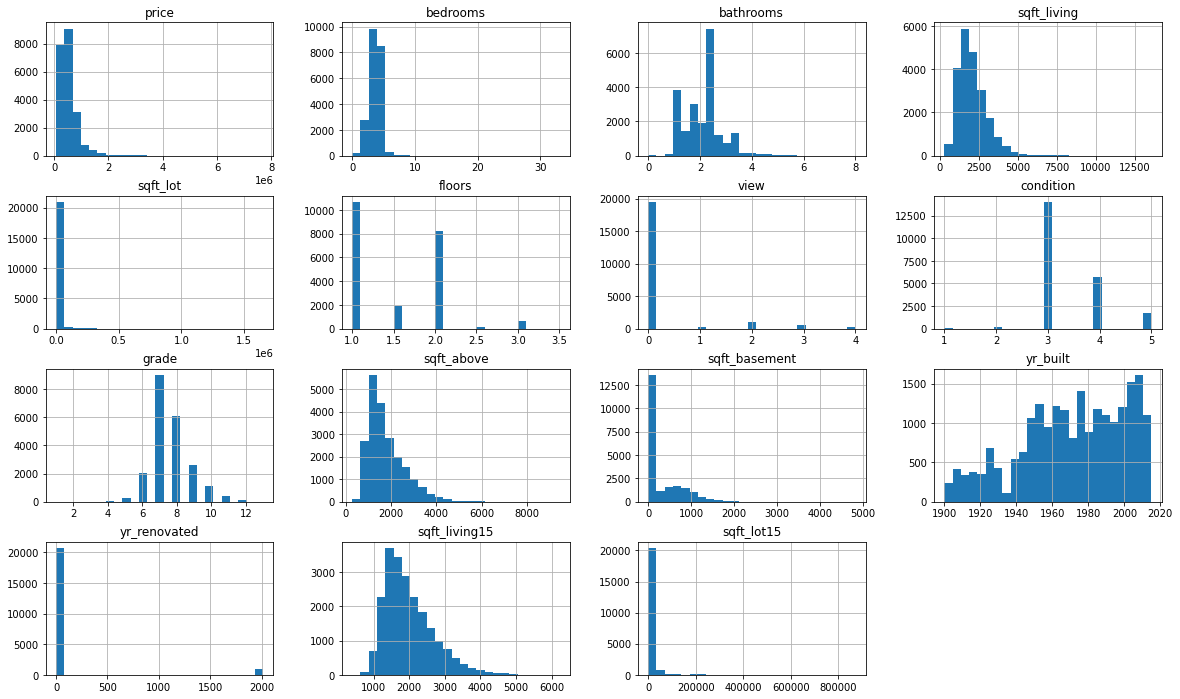

In [11]:
num_attributes.hist(bins = 25, figsize=(20,12));

### 1.6.2 Categorical Atributes

In [12]:
#% waterfrtont
waterfront_sim = len(cat_attributes.loc[cat_attributes['waterfront'] == 1 ])
waterfront_nao = len(cat_attributes.loc[cat_attributes['waterfront'] == 0 ])
print('***********************************************************************************************\n')
print('waterfront:\n')
print(f'Número de imóveis com vista para o mar: {waterfront_sim} ( {(waterfront_sim/(waterfront_sim+waterfront_nao))*100 :.4}% )')
print(f'Número de imóveis que não possuem vista para o mar:    {waterfront_nao}    ( {(waterfront_nao/(waterfront_sim+waterfront_nao))*100 :.4}% )\n')
print('***********************************************************************************************\n')

***********************************************************************************************

waterfront:

Número de imóveis com vista para o mar: 163 ( 0.7542% )
Número de imóveis que não possuem vista para o mar:    21450    ( 99.25% )

***********************************************************************************************



# 2.0. Data Cleanning

In [13]:
df2 = df1.copy()

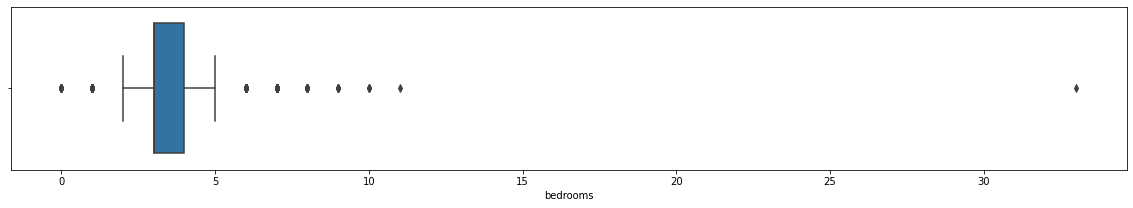

In [14]:
# Plot Box-Plot bedrooms:
variable_plot = df2['bedrooms']
sns.boxplot(variable_plot).figure.set_size_inches(20, 3);

> Analizando o gráfico box-plot da distribuição de números de banheiros, é possível constatar que há apenas um imóvel com número de banheiros bem acima da média e do segundo imóvel com mais banheiros, dando forte indício que realmente possa ser um erro.

In [15]:
df2[['price', 'bedrooms', 'sqft_living' ]].sort_values(by = ['bedrooms'], ascending = False).head()


price  bedrooms  sqft_living
15870   640000.0        33         1620
8757    520000.0        11         3000
15161   650000.0        10         3610
13314  1148000.0        10         4590
19254   660000.0        10         2920

> Numa analise de comparação com outros imóveis em relação ao tamanho interno dado por pés quadrados do imóvel, percebe-se que o imóvel com 33 quartos, possui um tamanho interno bem inferior que outros imóveis com número bem inferor de quarto, reforçando nossa tese de que este imóvel provavelmente esta errada. Assim iremos desconsiderar este imóvel para o seguimento do projeto. Assumindo a premissa que hoube erro neste dado. 

In [16]:
#Retirando o dado outlier do dataset:
df2 = df2.drop(15870)

# 3.0. Feature Engineering

In [17]:
df3 = df2.copy()

## 3.1. Mapa Mental de Hipoteses

## 3.2 Criação de Hipotéses

### 3.2.1 Hipoteses Qualidade do Imóvel 

1. Imóveis com melhores visualizações('view') possuem preḉo em média mais alto.
2. Imóveis em melhores condiçẽs('condition') possuem preço em média mais alto.
3. Imóveis com graduação('grade') mais elevadoas possuem preço em média mais alto. 

### 3.2.2 Hipoteses Localização do Imóvel 

1. Imóveis com localização de frente para o mar('frontwater') possuem preço médio mais alto. 
2. Há diferença de preços grandes na média dependendo do zipcode do imóvel. 
3. Imóveis com latitudes mais baixa possuem preço em média mais alto. 

### 3.2.3 Hipoteses Tempo 

1. Imóveis mais novos possuem preços mais alto. 
2. Imóveis que já foram reformados possuem preços mais alto.
3. Entre os imóveis que já foram reformados, so com data de reforma mais recente possuem preços mais alto. 
4. Imóveis com diferentes sazonalidades possuem diferença de preços expressivos. 

### 3.2.4 Tamanho Imóvel

1. Imóveis com maior área de espaço interno, possuem preço mais alto. 
2. Imóveis com maior terreno possuem preço mais alto.
3. Imóveis com mais quartos possuem preço mais alto. 
4. Imóveis com mais banheiros possuem preço mais alto. 
5. Imóveis que possuem porão possuem preço mais alto. 
6. Imóveis que possuem porão, os com maior porão possuem preços mais altos. 

### 3.2.5 Hipoteses Combinadas

1. Imóveis com vista para água e com 'grade' alto possuem preço mais alto
2. Imóveis reformados e com vista para a água possuem preço mais alto. 
3. Imóveis maiores mas com menos banheiros possuem preço mais baixo do que os grandes e com mais banheiros. 
4. Imóveis com mais quartos e menos banheiros possuem preços mais baixo.
5. Imóveis que possuem porão e tem maiores em áreas internas e porão pequeno possuem preço mais baixo.
6. Imóvies com vista para água e com area interna grande possuem relação de valorização maior. 
7  Dos imóveis com vista para água, possuem grandes variações de preços quando em zipcodes diferentes

### 3.2.6 Lista Final de Hipoteses

- H1. Imóveis em melhores condiçẽs('condition') possuem preço em média mais alto.
- H2. Imóveis com graduação('grade') mais elevadoas possuem preço em média mais alto.
- H3. Imóveis com localização de frente para o mar('frontwater') possuem preço médio mais alto. 
- H4. Há diferença de preços grandes na média dependendo do zipcode do imóvel. 
- H5. Imóveis com latitudes mais baixa possuem preço em média mais alto. 
- H6. Imóveis mais novos possuem preços mais alto. 
- H7. Imóveis que já foram reformados possuem preços mais alto.
- H8. Entre os imóveis que já foram reformados, so com data de reforma mais recente possuem preços mais alto.
- H9. Imóveis com diferentes sazonalidades possuem diferença de preços expressivos. 
- H10. Imóveis com maior área de espaço interno, possuem preço mais alto. 
- H11. Imóveis com maior terreno possuem preço mais alto.
- H12. Imóveis com mais quartos possuem preço mais alto. 
- H13. Imóveis com mais banheiros possuem preço mais alto. 
- H14. Imóveis que possuem porão possuem preço mais alto. 
- H15. Dos imóveis com porão, os com maior porão possuem preços mais altos. 
- H16 Imóveis com vista para água e com area interna grande possuem relação de valorização maior. 
- H17 Dos imóveis com vista para água, possuem grandes variações de preços quando em zipcodes diferentes

## 3.5 Feature Engeenering


In [18]:
#New columns year
df3['year'] =  pd.DatetimeIndex(df3['date']).year
df3['month'] = pd.DatetimeIndex(df3['date']).month

#New column level
df3['level'] = 'standard'
df3[ 'level' ] = df2['price'].apply( lambda x: 'high_standard' if x > 540000 else 'low_standard')

# New column house_age: 
df3['house_age'] = 'type' 
df3.loc[df2['yr_built'] >= 2000, 'house_age'] = 'new_house'
df3.loc[(df2['yr_built'] >= 1960) & (df2['yr_built'] < 2000), 'house_age'] = 'middle_house'
df3.loc[df2['yr_built'] < 1960, 'house_age'] = 'old_house'

#New column “dormitory_type” 
df3[ 'dormitory_type' ] = 'type'
df3[ 'dormitory_type' ] = df3['bedrooms'].apply( lambda x: 'studio'     if x <= 1
                                                 else      'apartment' if (x == 2) | (x == 3)
                                                 else      'house'     
                                                  
                                               )

# New column condition_type
df3['condition_type'] ='type'
df3['condition_type'] = df3[ 'condition' ].apply( lambda x: 'bad'      if x <= 2
                                                  else      'regular'  if (x == 3) | (x == 4)
                                                  else      'good'   
                                                )
df3[['level', 'dormitory_type', 'condition_type' ]].sample(20)

# New column condition_type
df3['condition_type'] ='type'
df3['condition_type'] = df2[ 'condition' ].apply( lambda x: 'bad'      if x <= 2
                                                  else      'regular'  if (x == 3) | (x == 4)
                                                  else      'good'   
                                                )
#Ner column season
df3['season'] = 'season'
df3[ 'season' ] = df3['month'].apply( lambda x: 'summer'     if (x >= 6) & (x <=8)
                                                 else      'fall'   if (x >= 9) & (x <=11)
                                                 else      'spring' if (x >= 3) & (x <=5)
                                                 else      'winter' 
                                                  
                                               )





df3[['level', 'dormitory_type', 'condition_type','month', 'year', 'house_age', 'season' ]].sample(5)

level dormitory_type condition_type  month  year     house_age  \
14991  low_standard          house        regular      2  2015     new_house   
2820   low_standard      apartment        regular      5  2015     old_house   
6813   low_standard      apartment        regular      3  2015  middle_house   
13727  low_standard      apartment        regular     12  2014     new_house   
16655  low_standard      apartment        regular      4  2015     old_house   

       season  
14991  winter  
2820   spring  
6813   spring  
13727  winter  
16655  spring

In [19]:
df3['month'] = pd.DatetimeIndex(df3['date']).month

In [20]:
df3['month']

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: month, Length: 21612, dtype: int64

# 4.0. EAD

In [21]:
df4 = df3.copy()

## 4.1. Univariate Analysis

### 4.1.1. Numerical Variables

#### Variável 'price'

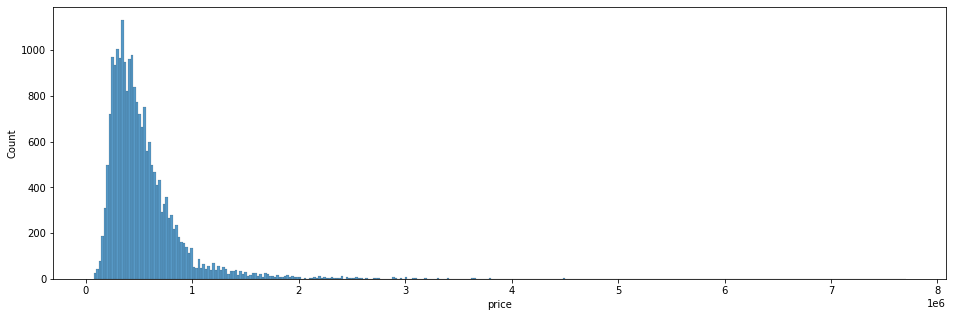

In [22]:
sns.histplot( df4['price'] ).figure.set_size_inches(16,5);

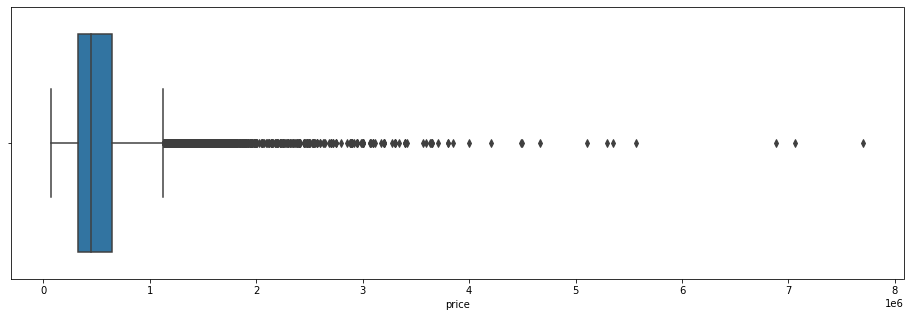

In [23]:
sns.boxplot(  df4['price'], orient = 'h' ).figure.set_size_inches(16,5);

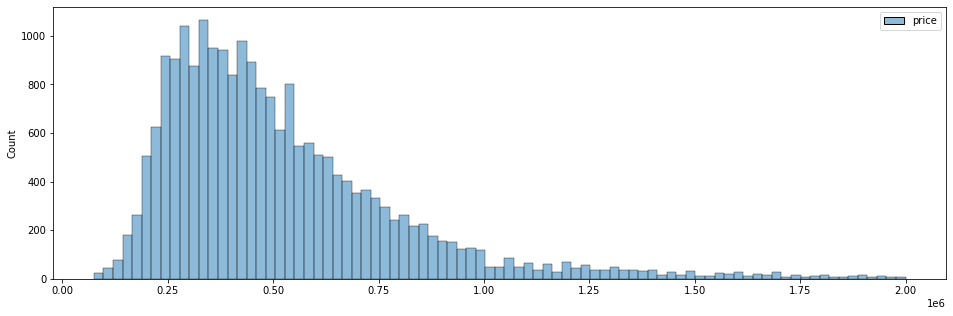

In [24]:
#filtro < 2000000
dfaux = df4[['price']].loc[df4['price'] < 2000000]
sns.histplot( dfaux ).figure.set_size_inches(16,5);

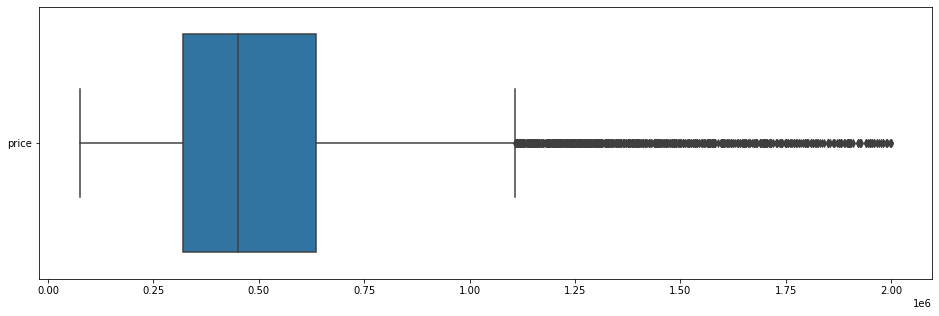

In [25]:
sns.boxplot(  data= dfaux, orient = 'h' ).figure.set_size_inches(16,5);

> Avaliando a variável preço, que é nossa variavel 'alvo', para responder os problemas de negócio. 
Percebemos que o número de casas com valores acima de 2.000.000 é muito pequeno. Como o objetivo é procurar oportunidades de imóveis com preços menores para conseguir vender mais caro, num primeiro momento usaremos a estratégia de filtrar para valores no máximo de 2000000. Levando em conta ainda que a maioria dos imóveis esta na faixa de 6300.000 a 600.000.  

#### Variável 'date'

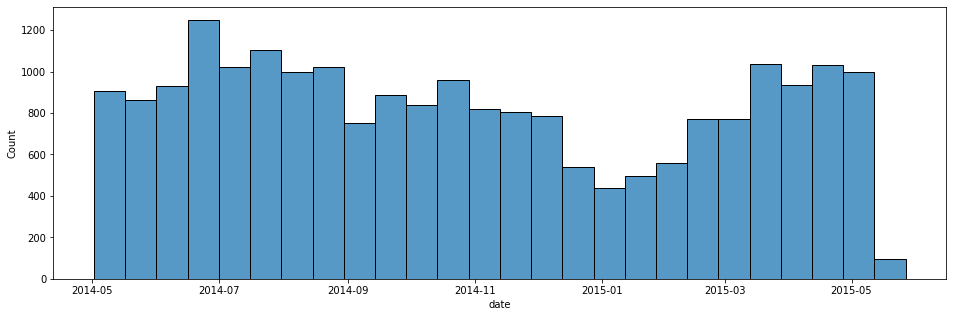

In [26]:
sns.histplot( df4['date'] ).figure.set_size_inches(16,5);

#### Variável 'bedrooms'

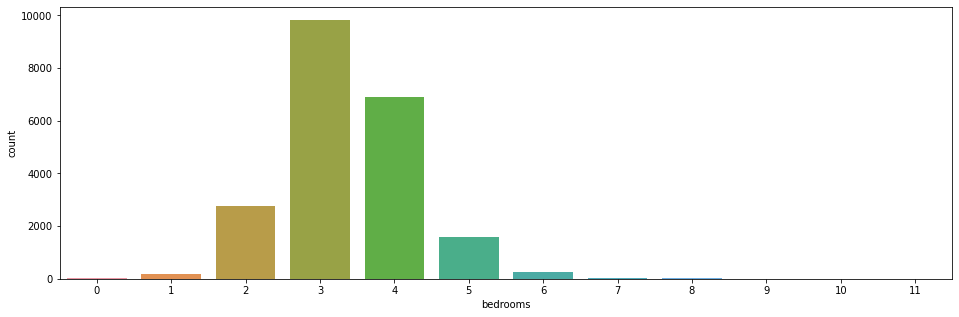

In [27]:
sns.countplot( df4['bedrooms'] ).figure.set_size_inches(16,5);

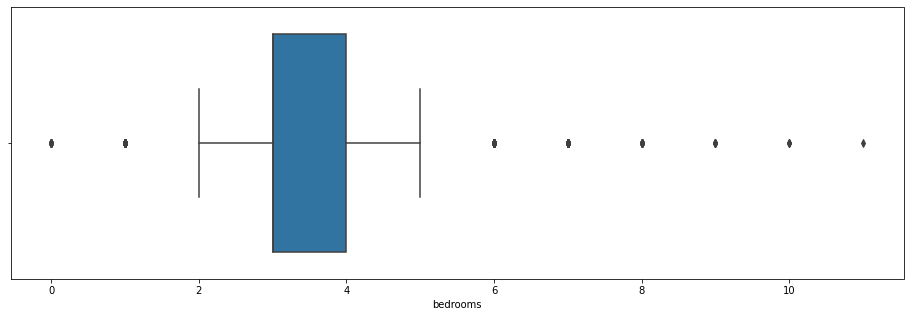

In [28]:
sns.boxplot(  df4['bedrooms'], orient = 'h' ).figure.set_size_inches(16,5);

> A maioria dos imóveis possui, de 0 a 4 quartos. Nota-se que uma boa parte dos imóveis possui de 3 a 4 quartos.

#### Variável 'bathrooms'

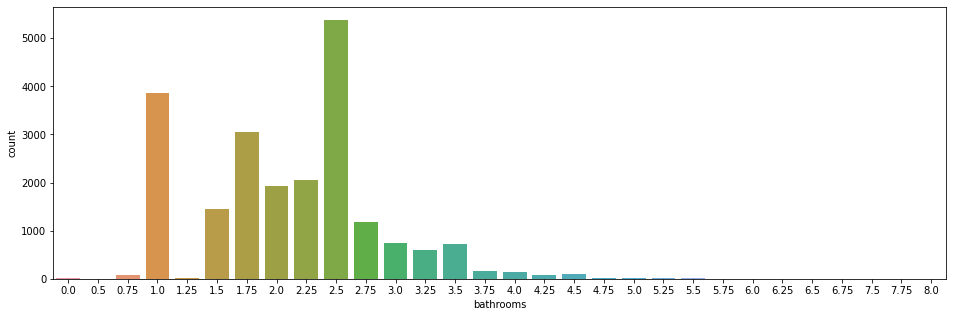

In [29]:
sns.countplot( df4['bathrooms'] ).figure.set_size_inches(16,5);

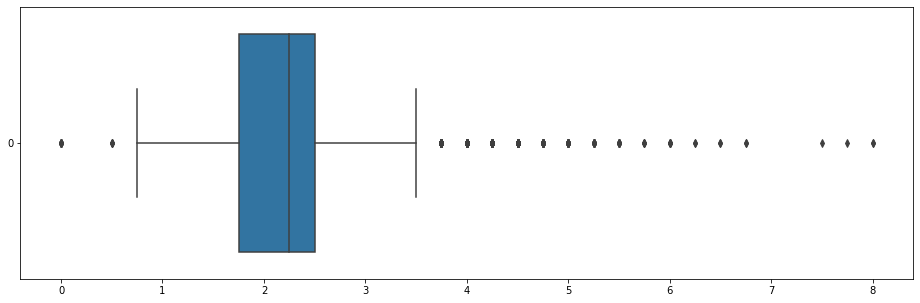

In [30]:
sns.boxplot(  data= df4['bathrooms'] , orient = 'h' ).figure.set_size_inches(16,5);

> Aqui percebe-se que a uma grande concentração por votla de 2 banheiros. Lembrando que esta classificação não é referente ao número certo de banheiros, pois o dataset usa número quebrado para classifiar alguns tipos de banheiros. 

#### Variável 'sqft_living'

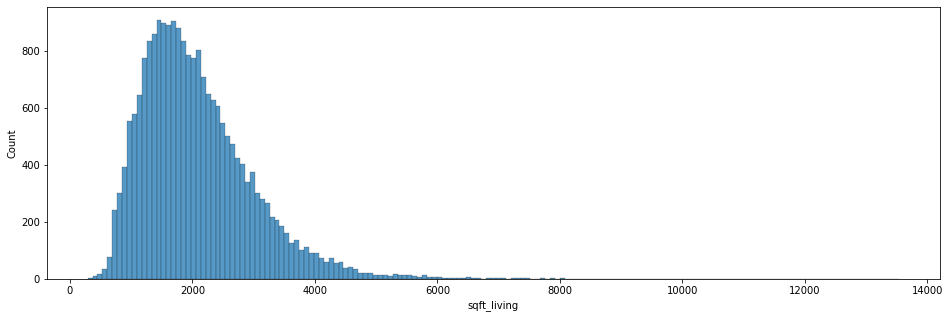

In [31]:
sns.histplot( df4['sqft_living'] ).figure.set_size_inches(16,5);

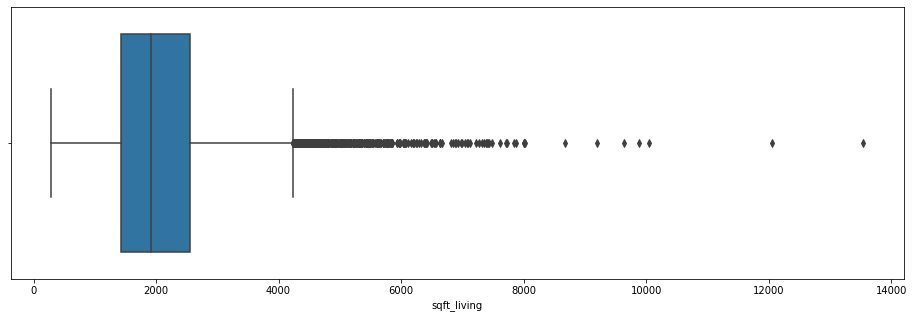

In [32]:
sns.boxplot(  df4['sqft_living'], orient = 'h' ).figure.set_size_inches(16,5);

In [33]:
df4[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront' ]].sort_values('sqft_living', ascending = False ).head(20)

price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront
12777  2280000.0         7       8.00        13540    307752           0
7252   7700000.0         6       8.00        12050     27600           0
3914   7062500.0         5       4.50        10040     37325           1
9254   6885000.0         6       7.75         9890     31374           0
8092   4668000.0         5       6.75         9640     13068           1
4411   5570000.0         5       5.75         9200     35069           0
14556  2888000.0         5       6.25         8670     64033           0
18302  3300000.0         5       6.25         8020     21738           0
1164   5110800.0         5       5.25         8010     45517           1
1448   5350000.0         5       5.00         8000     23985           0
13411  2415000.0         5       4.75         7880     24250           0
19858  2700000.0         4       4.00         7850     89651           0
16773  1920000.0         5       5.75         7730    230868           0
18477  3300000.0         8       4.00         7710     11750           0
14032  1680000.0         4       3.75         7620     29536           0
4024    800000.0         7       6.75         7480     41664           0
12370  4208000.0         5       6.00         7440     21540           0
11871  1950000.0         4       3.25         7420    167869           0
10373  2983000.0         5       5.50         7400     18898           0
1315   5300000.0         6       6.00         7390     24829           1

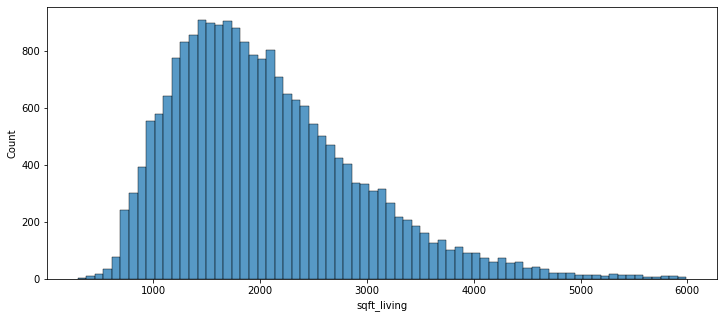

In [34]:
dfaux = df4['sqft_living'].loc[df4['sqft_living'] < 6000]
sns.histplot( dfaux ).figure.set_size_inches(12,5);

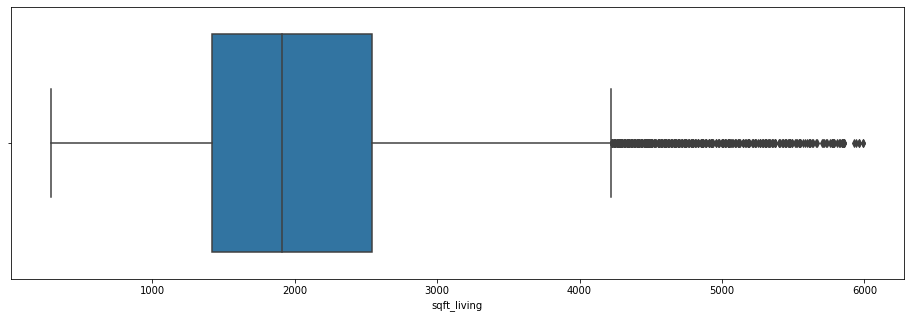

In [35]:
sns.boxplot(  dfaux, orient = 'h' ).figure.set_size_inches(16,5);

> Esta variável, também possui assim como preço, um grande número de outliers, novamente a estratégia inicial será focar no grupo com maior número de imóveis, assim num primeiro momento é interessante desconsierarmos imóveis com mais de 6000 pés quadrados de área interna.

#### Variável 'sqft_lot'

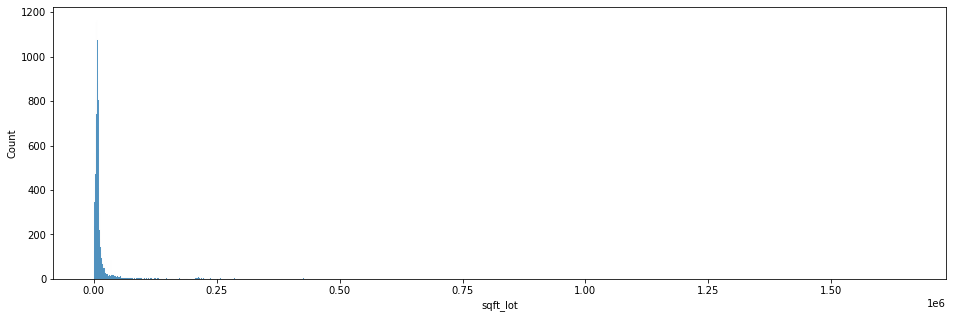

In [36]:
sns.histplot( df4['sqft_lot'] ).figure.set_size_inches(16,5);

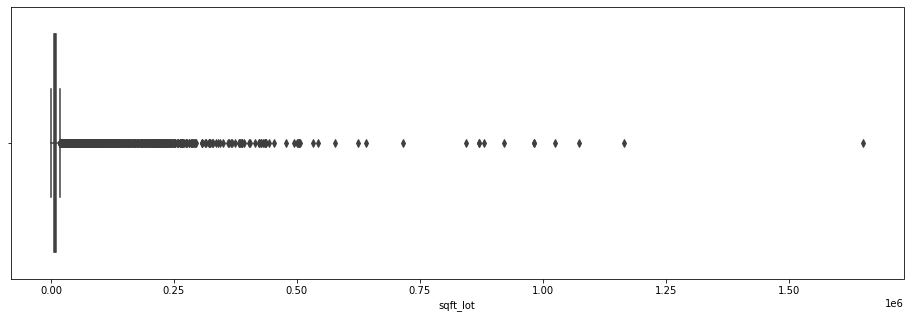

In [37]:
sns.boxplot(  df4['sqft_lot'], orient = 'h' ).figure.set_size_inches(16,5);

In [38]:
df4[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront' ]].sort_values('sqft_lot', ascending = False ).head(20)

price  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront
1719    700000.0         4       1.00         1300   1651359           0
17319   190000.0         2       1.00          710   1164794           0
7647    542500.0         5       3.25         3010   1074218           0
7769    855000.0         4       3.50         4030   1024068           0
3949    998000.0         4       3.25         3770    982998           0
4441    790000.0         2       3.00         2560    982278           0
6691   1998000.0         2       2.50         3900    920423           0
7077   1650000.0         4       3.25         3920    881654           0
20452  1600000.0         4       5.50         6530    871200           0
9714    937500.0         4       4.00         5545    871200           0
4540    550000.0         3       2.00         3650    843309           0
13006   750000.0         3       2.50         2350    715690           0
13477   849900.0         2       2.00         2280    641203           0
16188   700000.0         3       2.50         2530    623779           0
7294    700000.0         2       1.75         1679    577605           0
17825   425000.0         3       2.75         1360    542322           0
17576   375000.0         1       1.00          800    533610           0
12919   428000.0         3       1.75         1580    507038           0
2964    999000.0         3       2.75         2830    505166           1
20421   920000.0         4       3.75         4030    503989           0

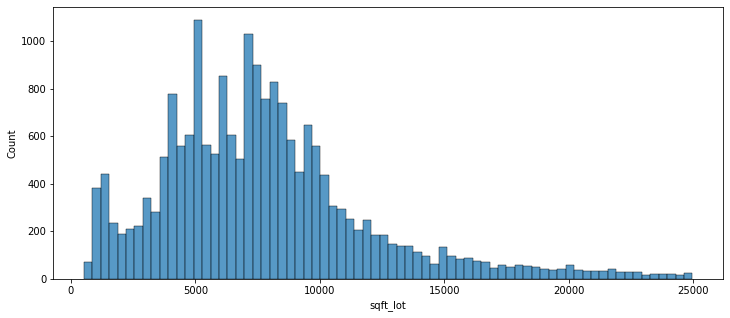

In [39]:
dfaux = df4['sqft_lot'].loc[df4['sqft_lot'] < 25000]
sns.histplot( dfaux ).figure.set_size_inches(12,5);

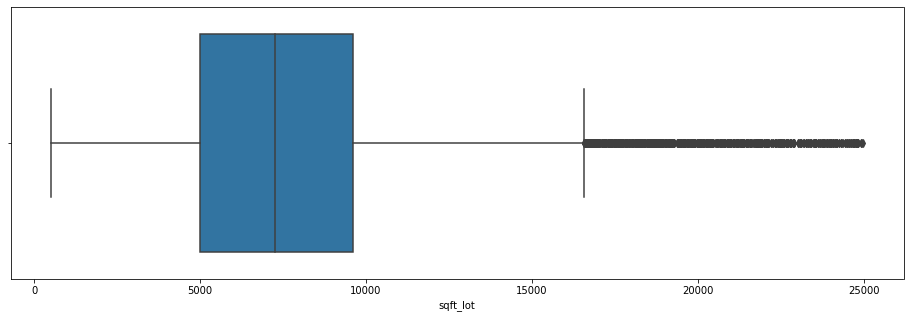

In [40]:
sns.boxplot(  dfaux, orient = 'h' ).figure.set_size_inches(16,5);

> Ao plotarmos o tamanho da area externa do imóvel, percebe-se alguns imóveis com área externa muito maiores, porém ao ordermos por ordem de tamanho, vemos que estas não possuem necessáriamente os preços mais altos nem areas internas maiores, levando a crer que podem ser sitios mais afastados dos centros urbanos. Podendo surgir boas oportunidades de compra neste tipo de imóvel, apesar de termos plotado imóveis delimitando com áreas externas menores para vermos melhor sua distribuição. Pretendemos conisiderar todos os imóveis para futuras avaliações de compra, pois podem surgir boas oportunidade entre os imóveis com terrenos maiores. 

> A grande maioria dos imóveis se encontram na faixa de 5000 a 10000 pés quadrados de area externa.

#### Variável 'floors'

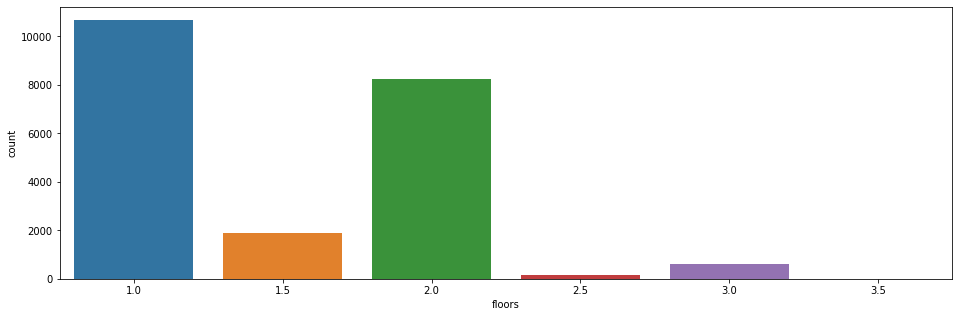

In [41]:
sns.countplot( df4['floors'] ).figure.set_size_inches(16,5);

> A imóveis com número de andares não inteiros. Não temos muitas informações do que seria. Notamos que a maioria dos imóveis tem de 1 a 2 andares. 

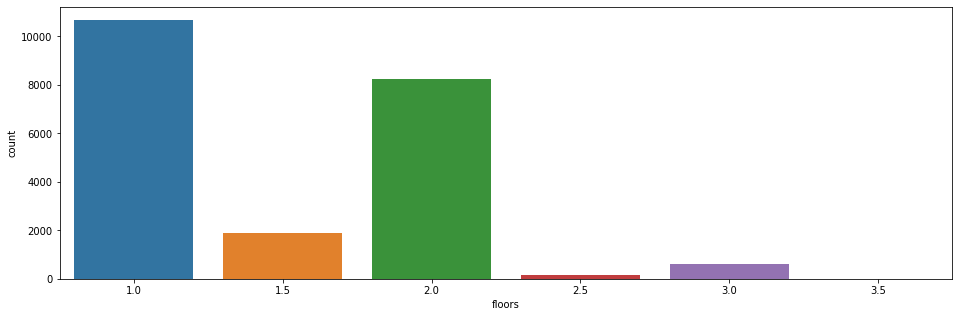

In [42]:
sns.countplot( df4['floors'] ).figure.set_size_inches(16,5);

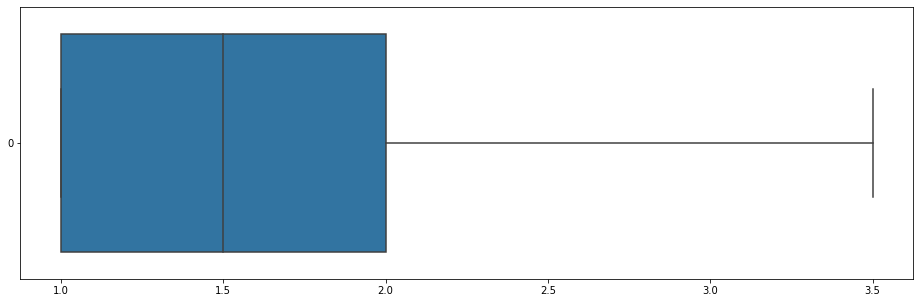

In [43]:
sns.boxplot(  data= df4['floors'], orient = 'h' ).figure.set_size_inches(16,5);

#### Variável 'grade'

Nota geral. O índice de 1 a 13 quanto a construção e design do edificio. Onde 1-3 esta a baixo, 7 médio, e 11-13 nível alto

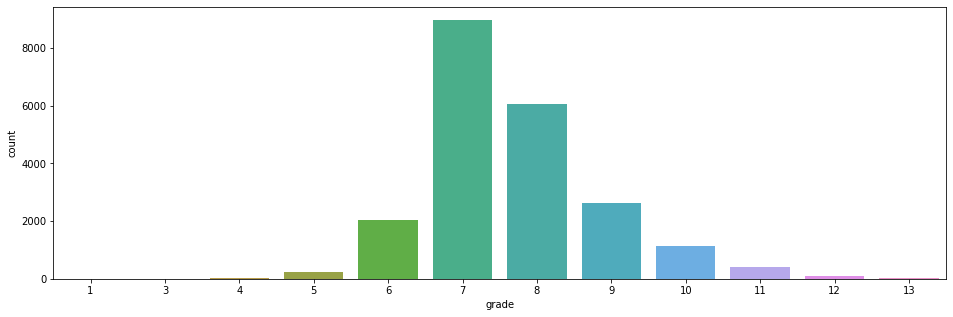

In [44]:
sns.countplot( df4['grade'] ).figure.set_size_inches(16,5);

> A maioria dos imóveis recebeu o grade em torno do médio 7. 

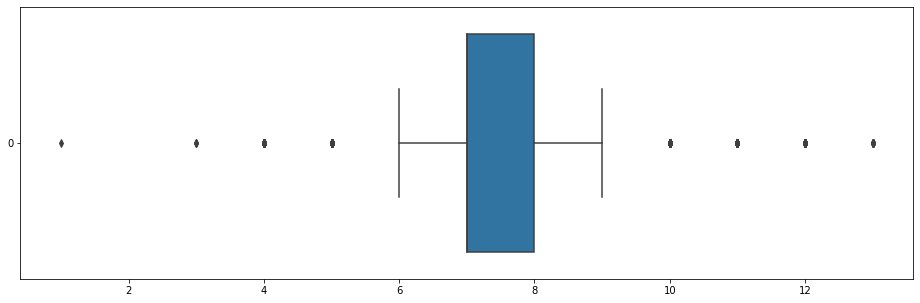

In [45]:
sns.boxplot(  data= df4.grade, orient = 'h' ).figure.set_size_inches(16,5);

#### Variável 'view'

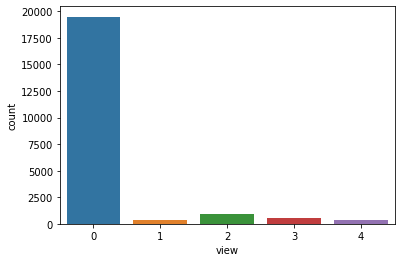

In [46]:
#sns.histplot( df4['view'], bins = 20 ).figure.set_size_inches(16,5);
sns.countplot(x ='view', data= df4);

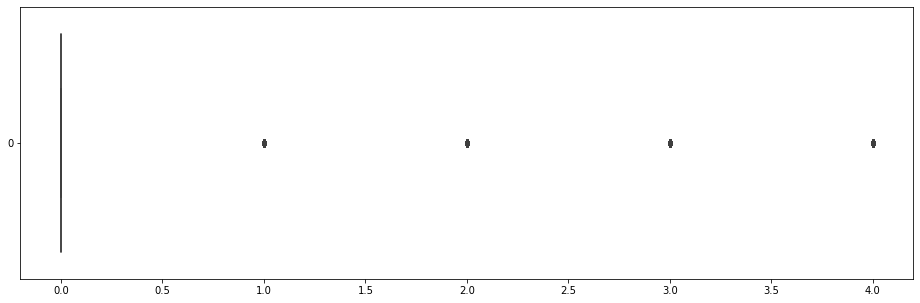

In [47]:
sns.boxplot(  data= df4.view, orient = 'h' ).figure.set_size_inches(16,5);

In [48]:
print('Porcentagem de imóveis com view=0 : ', round((len(df4.loc[df4['view'] == 0 ]) / len(df4))*100, 2) )

Porcentagem de imóveis com view=0 :  90.17


In [49]:
#deletar coluna 'view'
df4.drop(['view'], axis='columns', inplace=True )

> Como a um grande desbalanceamento nesta variável, não faz sentido levarmos ela em conta para podermos ter qualquer tipo de tomada de decisão, visto que mais de 90% dos imóveis receberam o classificação de view = 0. Assim foi decidido tirar esta variável para o restante das avaliações. 

#### Variável 'condition'

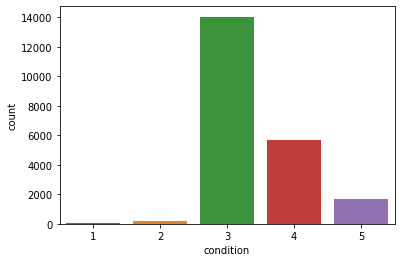

In [50]:
sns.countplot(x ='condition', data= df4);

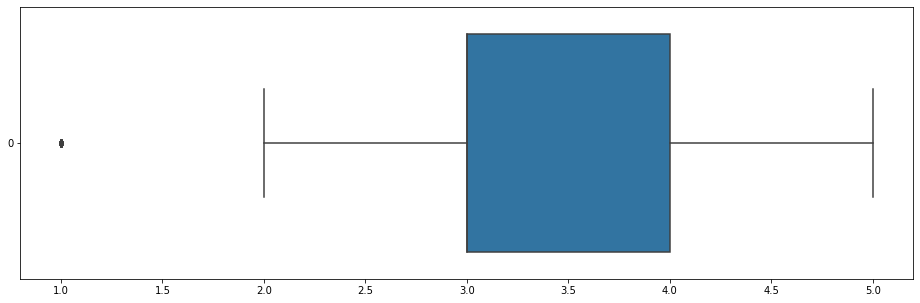

In [51]:
sns.boxplot(  data= df4.condition, orient = 'h' ).figure.set_size_inches(16,5);

> No gráfico plotado de distribuição se percebe que a um grande número de imóvel classificados como  condições 3 e 4. Apesar de perceber um certo desbalanceamento, esta variável pode ser levanda em conta, pois vemos que há classificação para todos, e a condição do imóvel é uma variável importante na hora de definirmos os preços. 

In [52]:
print(f'Número de imóveis em condições ruins(1 ou 2) é : {len(df4.loc[df4.condition <=2])} ')
print(f'Que representa em porcentagem do total: {round((len(df4.loc[df4.condition <=2])*100/len(df4)), 2)}')

Número de imóveis em condições ruins(1 ou 2) é : 202 
Que representa em porcentagem do total: 0.93


#### Variável 'sqft_above'

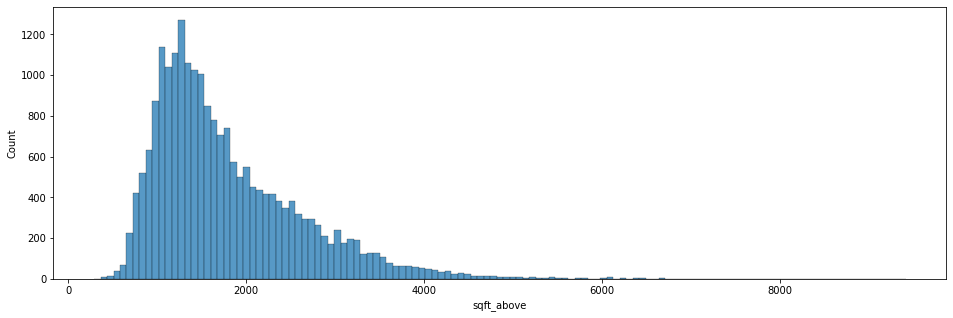

In [53]:
sns.histplot( df4['sqft_above'] ).figure.set_size_inches(16,5);

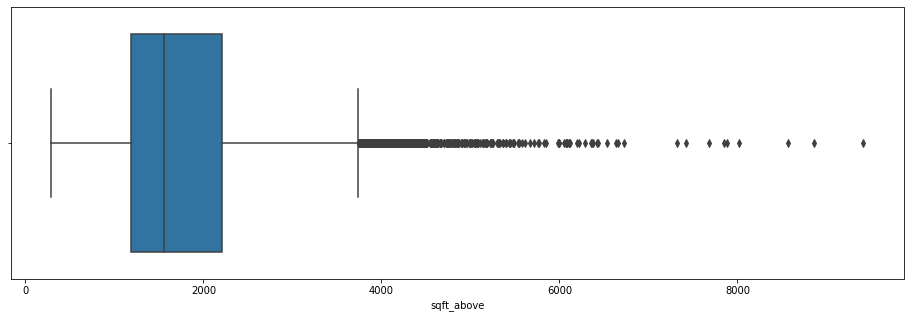

In [54]:
sns.boxplot(  df4['sqft_above'], orient = 'h' ).figure.set_size_inches(16,5);

> Esta variável possui alguns outliers. Levando em conta que ela tem bastante semelhança com a sqft_living. Onde nesta é descontado o tamanho das casas que possuem porão, é normal que tenha comportamento semelhante. E da para reparar que a concentração de maior número de imóveis fica em torno de 1000 a 3000 pés quadrados de área

#### Variável 'sqft_basement'

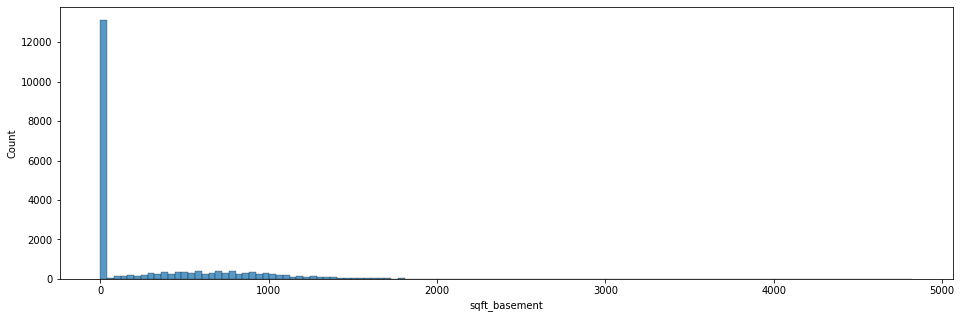

In [55]:
sns.histplot( df4['sqft_basement'] ).figure.set_size_inches(16,5);

In [56]:
print('Porcentagem de imóveis sem porão: ', round((len(df4.loc[df4['sqft_basement'] == 0 ]) / len(df4))*100, 2) )

Porcentagem de imóveis sem porão:  60.73


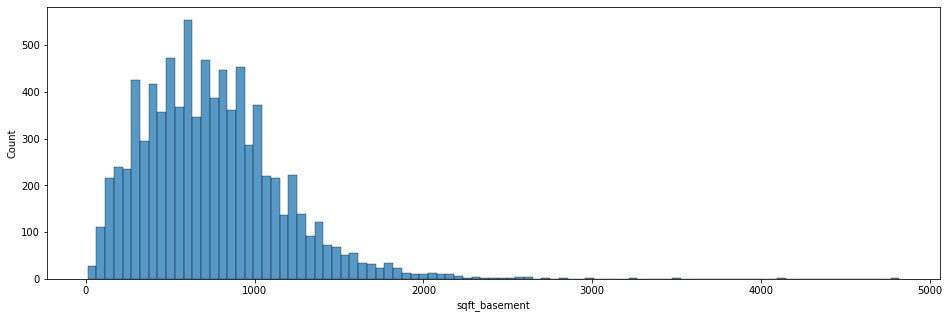

In [57]:
#Com porão
dfaux = df4['sqft_basement'].loc[df4['sqft_basement'] != 0 ]
sns.histplot( dfaux  ).figure.set_size_inches(16,5);

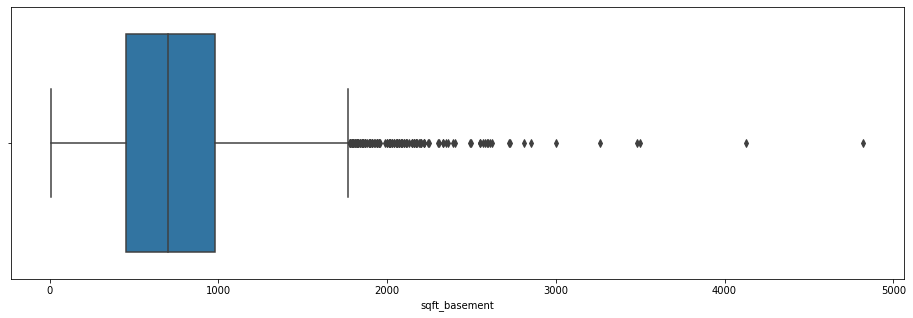

In [58]:
sns.boxplot(  dfaux, orient = 'h' ).figure.set_size_inches(16,5);

> Percebemos ao fazer o primeiro plote de distribuição considerando todos os dados, um grande número de imóveis sem porão. Assim, para melhor visualização plotamos a distribuição apenas dos imóveis sem porão. Percebesse que possui alguns outliers e que a concentração é até 120 pes quadrados de porão.

> Em futuras analises, ao consideramos cruzar esta variável com outras, iremos avaliar como sem e com porão para podermos ter uma avaliação melhor no impacto nos preços. 


#### Variável 'yr_built'

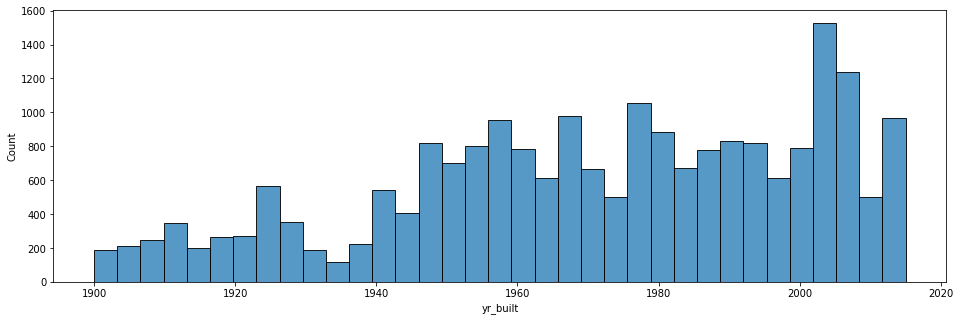

In [59]:
sns.histplot( df4['yr_built'] ).figure.set_size_inches(16,5);

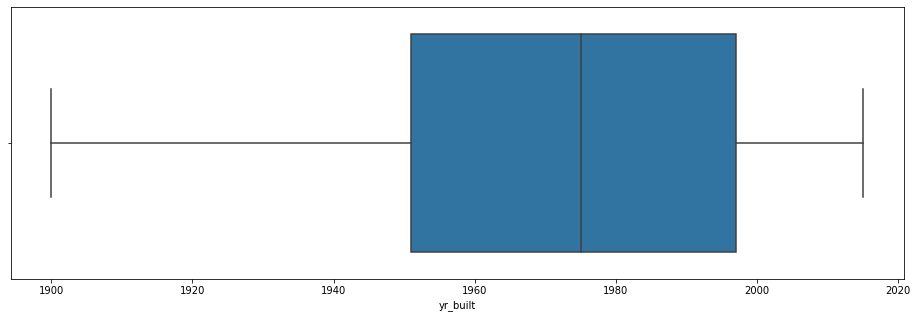

In [60]:
sns.boxplot(  df4['yr_built'], orient = 'h' ).figure.set_size_inches(16,5);

> Ao plotar os gráficos de distribuição quanto ao ano de construção, vemos que temos uma boa distribuição ao longo do tempo, tendo uma maior concentração nos anos de 1950 a 2015

#### Variável 'yr_renovated'

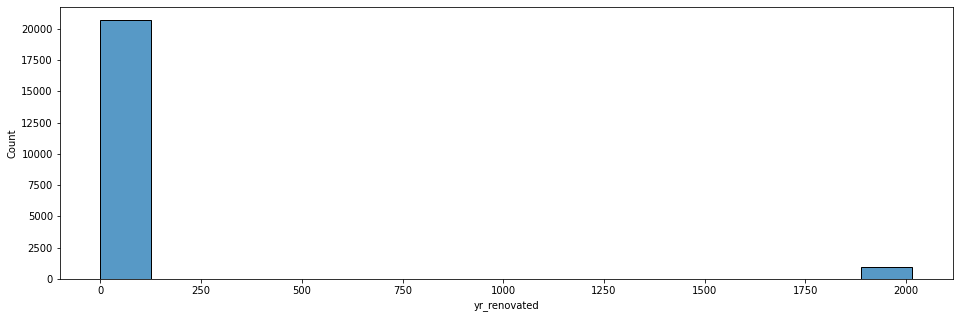

In [61]:
sns.histplot( df4['yr_renovated'] ).figure.set_size_inches(16,5);

In [62]:
print('Porcentagem de imóveis não foram reformados : ', round((len(df4.loc[df4['yr_renovated'] == 0 ]) / len(df4))*100, 2) )

Porcentagem de imóveis não foram reformados :  95.77


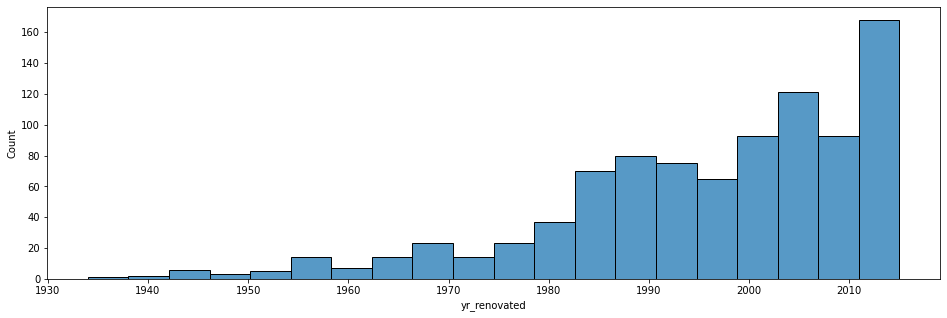

In [63]:
#imóveis não reformados
dfaux = df4['yr_renovated'].loc[df4['yr_renovated'] != 0 ]
sns.histplot( dfaux  ).figure.set_size_inches(16,5);

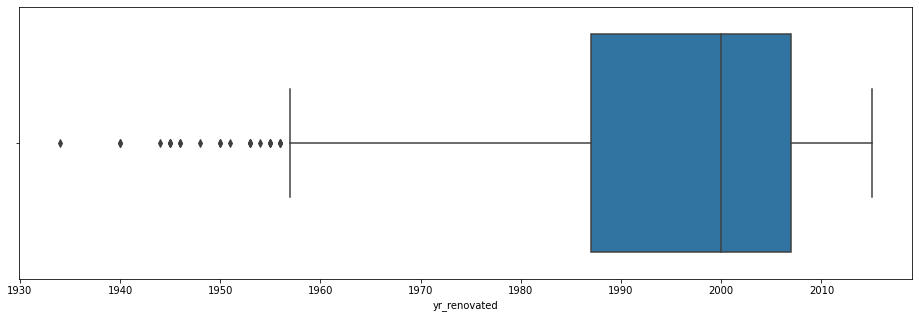

In [64]:
sns.boxplot(  dfaux, orient = 'h' ).figure.set_size_inches(16,5);

> Ao plotar a distribuição do yr_renovated percebe-se que grande parte dos imóveis não foram reformados, ao fazer o calculo, temos que 95% dos imóvies nunca foram reformados. Assim, foi plotamos com filtro os que já foram reformados, quais foram os anos da ultima reforma, temos uma concentração destes nos anos de 1990 em diante. 

#### Variável 'zipcode'

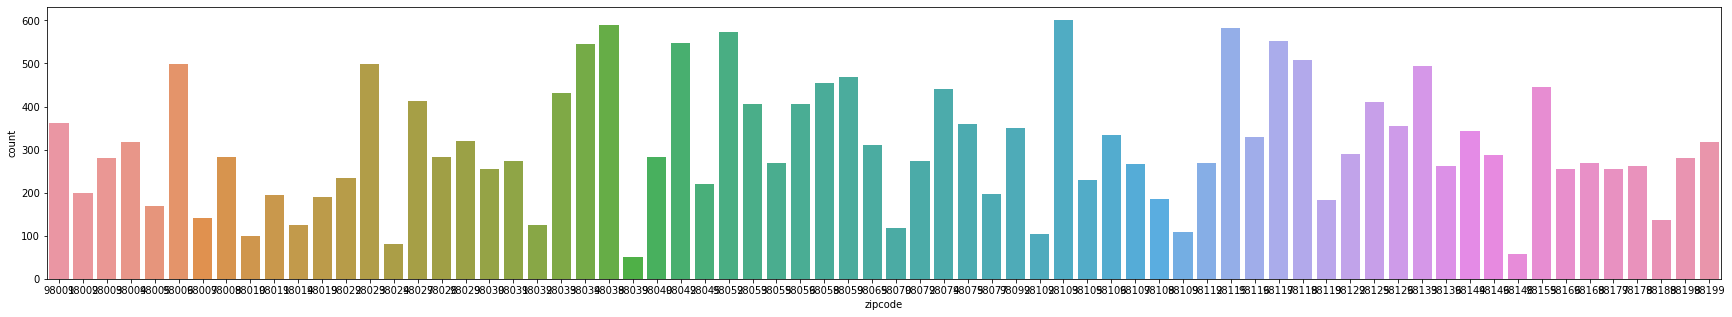

In [65]:
sns.countplot( df4['zipcode'] ).figure.set_size_inches(30,5);

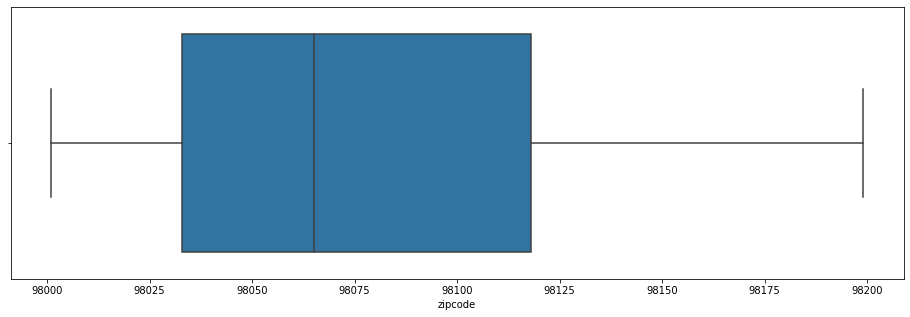

In [66]:
sns.boxplot(  df4['zipcode'], orient = 'h' ).figure.set_size_inches(16,5);

> O zipcode é uma variável que de forma isolada não nos diz muita coisa. A unica informação que se pode tirar é que tem imóveis expalhados por todas as regiões, tendo algumas concentraçãoes maiores ema algumas regiões. 

In [67]:
len(df4.zipcode.unique())

70

#### Variável 'lat'

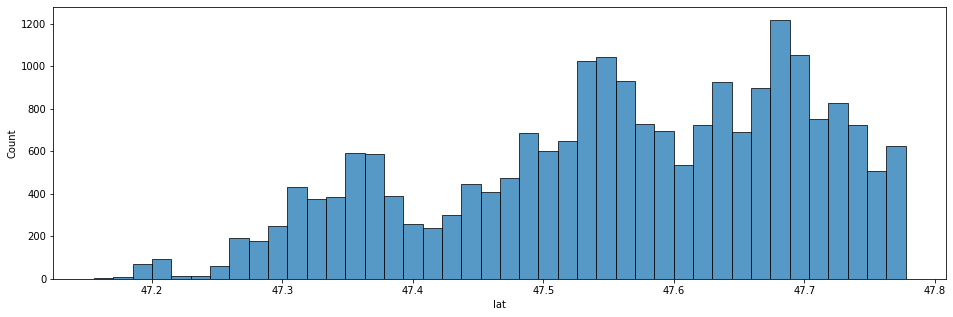

In [68]:
sns.histplot( df4['lat'] ).figure.set_size_inches(16,5);

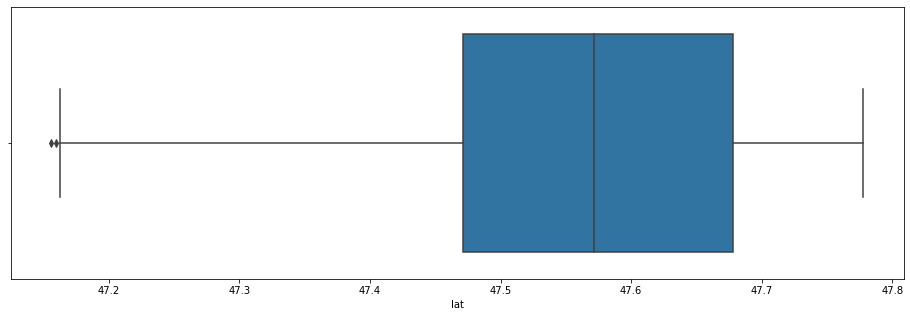

In [69]:
sns.boxplot(  df4['lat'], orient = 'h' ).figure.set_size_inches(16,5);

> Quanto a latitude, percebemos que exite concentração maior de imóveis em latitudes maiores. 

#### Variável 'long'

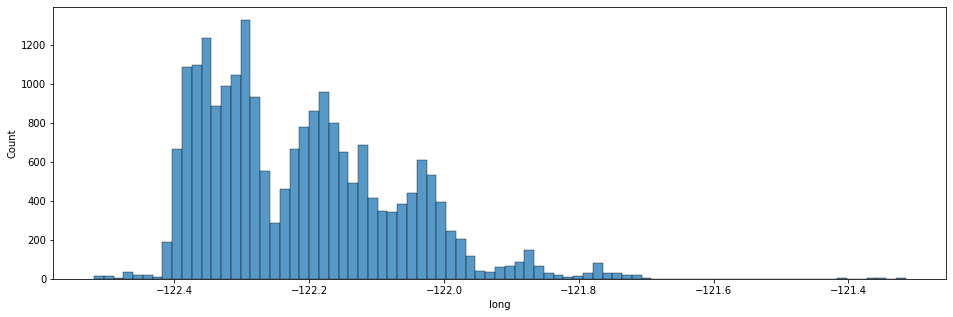

In [70]:
sns.histplot( df4['long'] ).figure.set_size_inches(16,5);

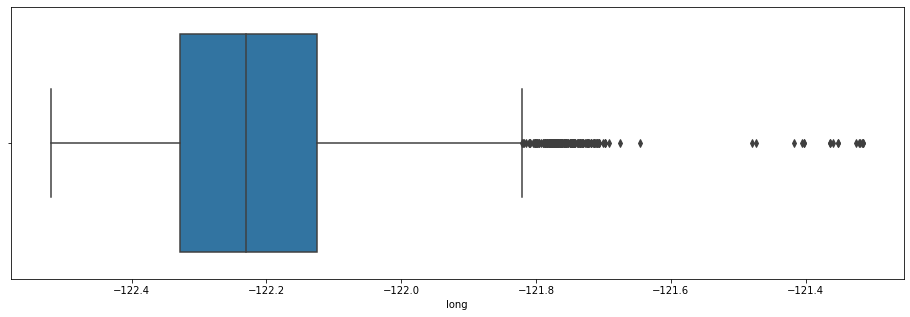

In [71]:
sns.boxplot(  df4['long'], orient = 'h' ).figure.set_size_inches(16,5);

> Quanto a longitude temos uma maior concentração em longitudes mais a Oeste.

#### Variável 'sqft_living15'

Tamanho médio em pés quadrados do espaço interno de habitação para as 15 casas mais próximas

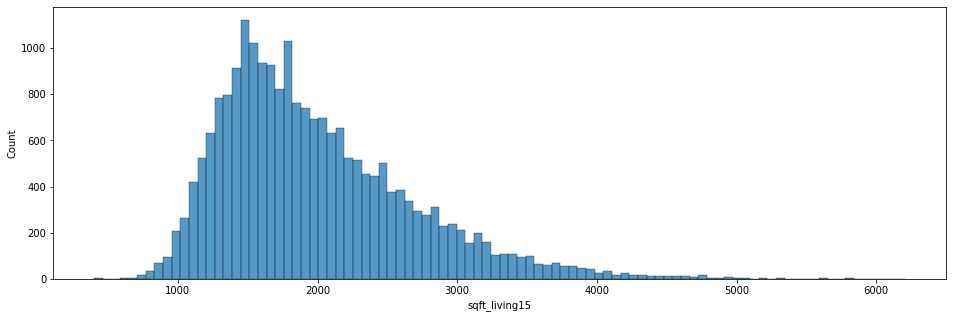

In [72]:
sns.histplot( df4['sqft_living15'] ).figure.set_size_inches(16,5);

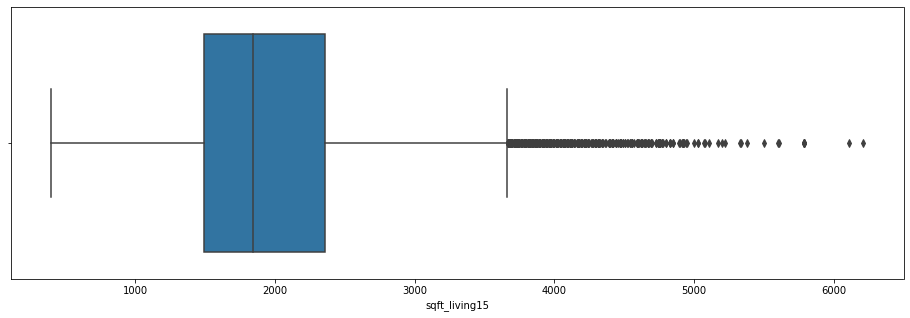

In [73]:
sns.boxplot(  df4['sqft_living15'], orient = 'h' ).figure.set_size_inches(16,5);

> Esta variável indica o tamanho do area interna dos 15 imóveis mais próximos, em termos de distribuição, é muito parecido com a variável sqft_living. com concentração entre 150 a 250 pes quadrados de área interna.  

#### Variável 'sqft_lot15'

Tamanho médio dos terrenos em metros quadrados para as 15 casas mais próximas.

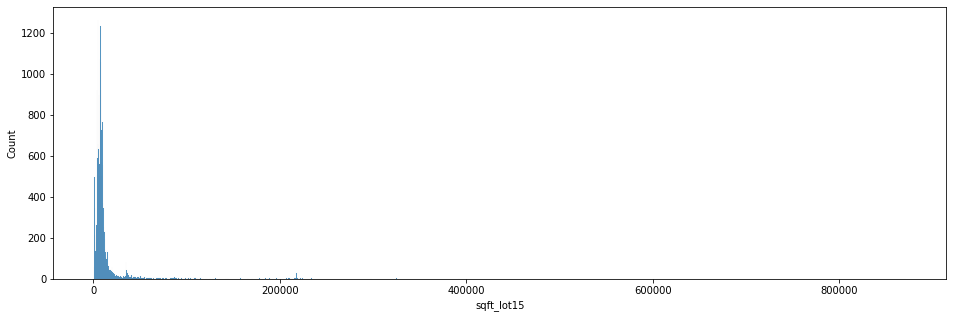

In [74]:
sns.histplot( df4['sqft_lot15'] ).figure.set_size_inches(16,5);

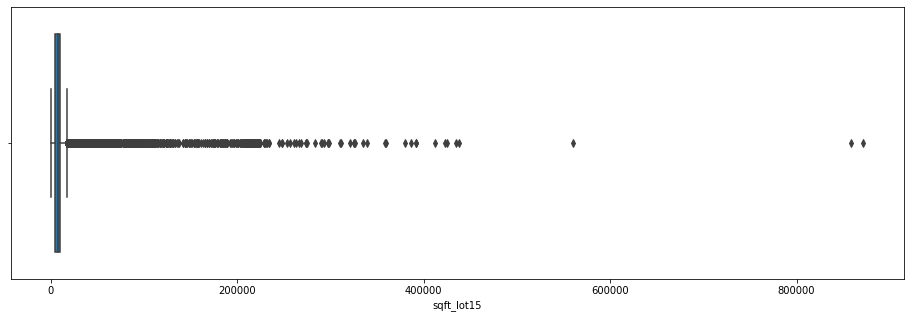

In [75]:
sns.boxplot(  df4['sqft_lot15'], orient = 'h' ).figure.set_size_inches(16,5);

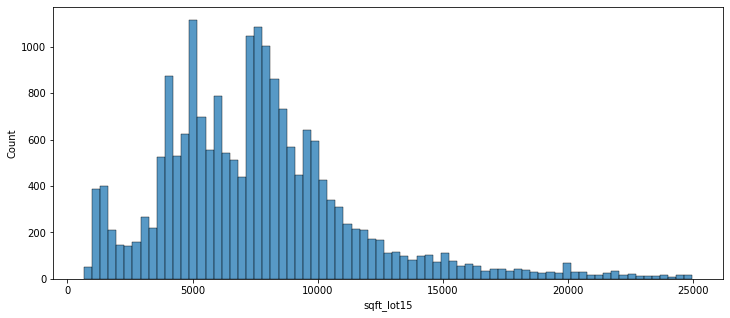

In [76]:
dfaux = df4['sqft_lot15'].loc[df4['sqft_lot15'] < 25000]
sns.histplot( dfaux ).figure.set_size_inches(12,5);

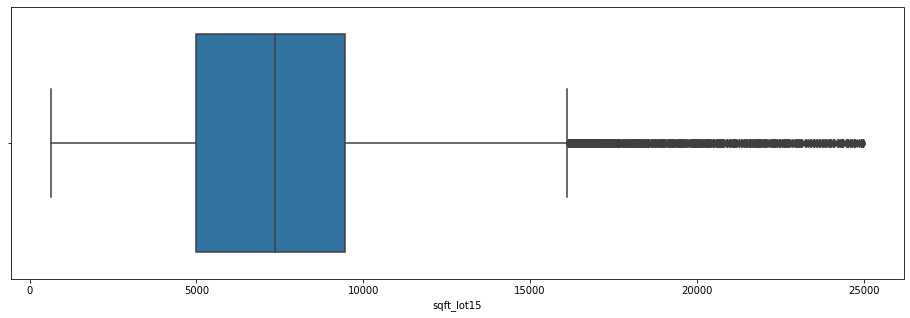

In [77]:
sns.boxplot(  dfaux, orient = 'h' ).figure.set_size_inches(16,5);

> Quanto a distribuição esta variável acaba tendo características muito parecidas a sqtf_lot, pois a distribuição para área do lote em pés quadrados é semelhante a dos 15 imóveis mais próximas d

#### Variável 'year'

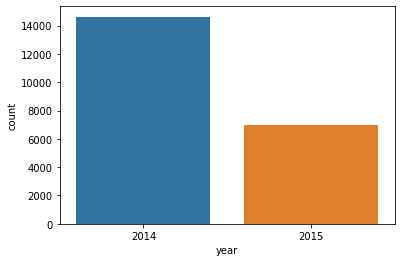

In [78]:
sns.countplot(x ='year', data= df4);

In [79]:
print('Porcentagem de imóveis adicionados na base em 2015 : ', round((len(df4.loc[df4['year'] == 2015 ]) / len(df4))*100, 2) )
print('Porcentagem de imóveis adicionados na base em 2014 : ', round((len(df4.loc[df4['year'] == 2014 ]) / len(df4))*100, 2) )

Porcentagem de imóveis adicionados na base em 2015 :  32.3
Porcentagem de imóveis adicionados na base em 2014 :  67.7


> A váriável year, que indica o ano que o imóvel foi colocado na base, percebemos que é dicotonica, pois tem apenas dois anos distintos. Para avaliação futura quanto a preço do imóvel esta variável não inica muita coisa.

### 4.1.2. Categorical Variables

#### Variável 'level'

- high_standerd : Imóveis com preços superiores a 540000
- low_standerd : Imóveis com preços até  540000
    

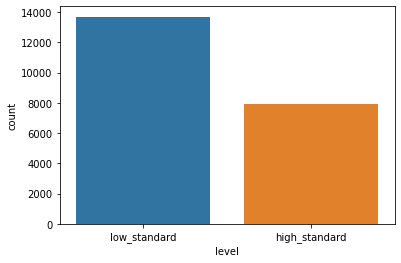

In [80]:
sns.countplot(x = 'level', data= df4);

In [81]:
print('Porcentagem de low_standard : ', round((len(df4.loc[df4['level'] == 'low_standard' ]) / len(df4))*100, 2) )
print('Porcentagem de high_stard : ', round((len(df4.loc[df4['level'] == 'high_standard' ]) / len(df4))*100, 2) )

Porcentagem de low_standard :  63.36
Porcentagem de high_stard :  36.64


> Vemos uma boa quantidade das duas categorias. Com uma quantidade maior de imóveis de valores low_standard

#### Variável 'house_age'

- new_house: Imóveis construidos após o ano de 2000
- middle_house: Imóveis contruidos entre os anos de 1960 e 2000
- old_house: Imóveis contruidos até 1960

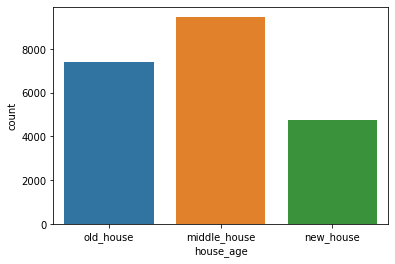

In [82]:
sns.countplot(x = 'house_age', data= df4);

In [83]:
print('Porcentagem de casas old_house : ', round((len(df4.loc[df4['house_age'] == 'old_house' ]) / len(df4))*100, 2) )
print('Porcentagem de middle_house : ', round((len(df4.loc[df4['house_age'] == 'middle_house' ]) / len(df4))*100, 2) )
print('Porcentagem de new_house : ', round((len(df4.loc[df4['house_age'] == 'new_house' ]) / len(df4))*100, 2) )

Porcentagem de casas old_house :  34.18
Porcentagem de middle_house :  43.8
Porcentagem de new_house :  22.02


> Vemos que existem uma distribuição boa com relação a idade da construção das casas e um bom número de casas new_house, mesmo ainda sendo a minoria, podendo aparecer boas oportunidades ai. 

#### Variável 'dormitory_type'

- studio: Imóveis com até 1 quarto 
- apartament: Imóveis com 2 ou 3 quartos
- house: Imóveis com 4 ou mais quartos

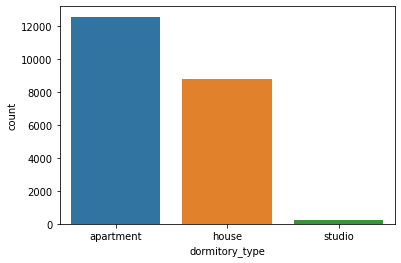

In [84]:
sns.countplot(x = 'dormitory_type', data= df4);

In [85]:
print('Porcentagem de apartment : ', round((len(df4.loc[df4['dormitory_type'] == 'apartment' ]) / len(df4))*100, 2) )
print('Porcentagem de house : ', round((len(df4.loc[df4['dormitory_type'] == 'house' ]) / len(df4))*100, 2) )
print('Porcentagem de studio : ', round((len(df4.loc[df4['dormitory_type'] == 'studio' ]) / len(df4))*100, 2) )

Porcentagem de apartment :  58.23
Porcentagem de house :  40.79
Porcentagem de studio :  0.98


> Ao separar os imóveis pelo número de quartos, vemos que o tipo studio possui muita pouca quantidade na nossa base de dados.

#### Variável 'condition_type'

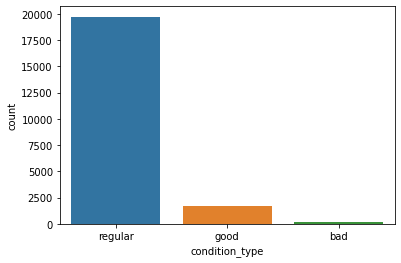

In [86]:
sns.countplot(x = 'condition_type', data= df4);

In [87]:
print('Porcentagem de regular : ', round((len(df4.loc[df4['condition_type'] == 'regular' ]) / len(df4))*100, 2) )
print('Porcentagem de good : ', round((len(df4.loc[df4['condition_type'] == 'good' ]) / len(df4))*100, 2) )
print('Porcentagem de bad : ', round((len(df4.loc[df4['condition_type'] == 'bad' ]) / len(df4))*100, 2) )

Porcentagem de regular :  91.2
Porcentagem de good :  7.87
Porcentagem de bad :  0.93


> A grande maioria dos imóveis estão em condição regular. Pode ser um indicativo para conseguir dentro dos good, algum com preço bom em futuras analises. 

#### Variável 'waterfront'

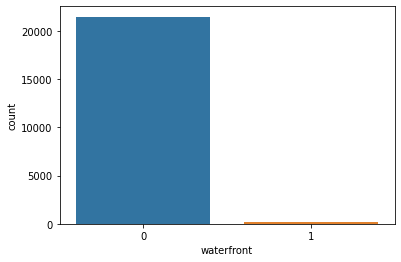

In [88]:
sns.countplot(x = 'waterfront', data= df4);

In [89]:
print('Porcentagem de não waterfront  : ', round((len(df4.loc[df4['waterfront'] == 0 ]) / len(df4))*100, 2) )
print('Porcentagem de waterfront : ', round((len(df4.loc[df4['waterfront'] == 1 ]) / len(df4))*100, 2) )

Porcentagem de não waterfront  :  99.25
Porcentagem de waterfront :  0.75


> Este variável esta bem desbalanceada, vemos que a um grande número de imóveis que não possuem vista para a água. 

#### Variável 'season'

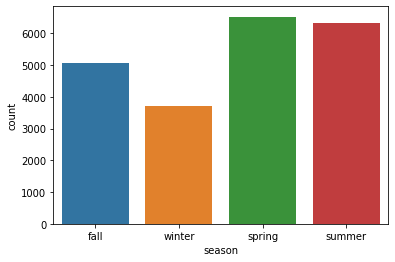

In [90]:
sns.countplot(x = 'season', data= df4);

In [91]:
print('Porcentagem casas adiquiridas no Inverno : ', round((len(df4.loc[df4['season'] == 'winter' ]) / len(df4))*100, 2) )
print('Porcentagem de middle_house : ', round((len(df4.loc[df4['season'] == 'spring' ]) / len(df4))*100, 2) )
print('Porcentagem de new_house : ', round((len(df4.loc[df4['season'] == 'summer' ]) / len(df4))*100, 2) )
print('Porcentagem de new_house : ', round((len(df4.loc[df4['season'] == 'fall' ]) / len(df4))*100, 2) )

Porcentagem casas adiquiridas no Inverno :  17.12
Porcentagem de middle_house :  30.17
Porcentagem de new_house :  29.29
Porcentagem de new_house :  23.43


## 4.2. Bivariate Analysis

### H1. Imóveis em melhores condições('condition') possuem preço em média mais alto.
<b>FALSO</b> Apesar de ter um aumento quando classificados nas condiçoes 1 e 2, acima de 3 a um equilibrio, iclusive a média de preço dos imóveis em condições 3 é superior a 4. Porém imóveis com condições de 3 ou mais possuem 60% de valorização em média.

In [92]:
dfaux = round(df4[['condition', 'price']].groupby('condition').mean(), 2).reset_index()
dfaux.sort_values('price')

condition      price
1          2  327287.15
0          1  334431.67
3          4  521200.39
2          3  542012.58
4          5  612401.86

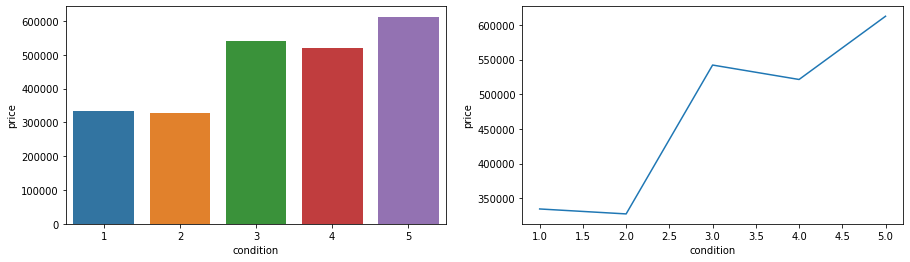

In [93]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(data= dfaux, x = "condition", y= "price", ax=axs[0]);
sns.lineplot(data= dfaux, x = "condition", y= "price", ax=axs[1]);

In [94]:
print(f'Imóveis com classificados com condições de 3 ou mais possuem preço em média{round(558538.27/330859.41)} superiores.')

Imóveis com classificados com condições de 3 ou mais possuem preço em média2 superiores.


> Casas com condition acima de 3 não possuem uma grande influência nos preços. Levando em conta que casas com condições 1 e 2 possuem desvalorização de 60% nos preços. Para resolução a indicação na lista final vamos eliminar casas com condition 1 ou 2 poi estas representam apenas 0.9% do nosso dataset.

### H2. Imóveis com graduação('grade') mais elevadoas possuem preço em média mais alto.
<b>VERDADEIRA</b> A medida que aumenta o 'grade', que é uma medida quanto ao desigin do imóvel, o preço medio do imóvel sobe. Esta diferença é aumentada ainda acima da graduação 6 em diantes.

In [95]:
dfaux = round(df4[['grade', 'price']].groupby('grade').mean(), 2).reset_index()
dfaux.sort_values('price')

grade       price
0       1   142000.00
1       3   205666.67
2       4   214381.03
3       5   248523.97
4       6   301919.64
5       7   402563.82
6       8   542852.77
7       9   773513.19
8      10  1071771.07
9      11  1496841.73
10     12  2191222.00
11     13  3709615.38

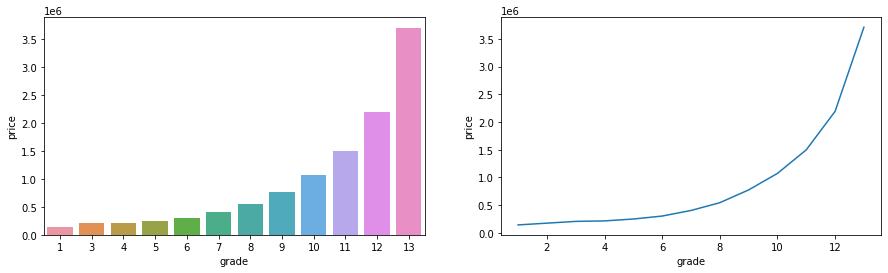

In [96]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(data= dfaux, x = "grade", y= "price", ax=axs[0]);
sns.lineplot(data= dfaux, x = "grade", y= "price", ax=axs[1]);

### H3. Imóveis com localização de frente para o mar('waterfront') possuem preço médio mais alto.
<b>VERDADEIRA</b> Em média os imóveis com localização 'waterfront' chegam a ter 3x mais o valor dos que não possuem esta localização. 

In [98]:
dfaux = round(df4[['waterfront', 'price']].groupby('waterfront').mean(), 2).reset_index()
dfaux

waterfront       price
0           0   531558.54
1           1  1661876.02

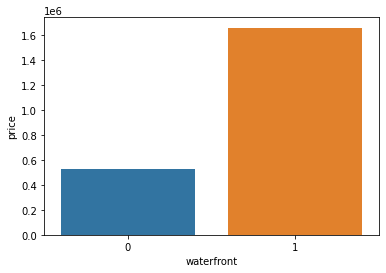

In [99]:
sns.barplot(data= dfaux, x = "waterfront", y= "price");

In [100]:
print(f'O preço de imóveis que possuem vista para aguá, são em méidia: {round(1661876.02/531558.54, 2)} superiores aos que não possuem vista.')

O preço de imóveis que possuem vista para aguá, são em méidia: 3.13 superiores aos que não possuem vista.


### H4. Há diferença de preços grandes na média dependendo do zipcode do imóvel.
<b>VERDADEIRA</b> Ao ordenarmos por preço medio, percebemos que o preço do imóvel é muito mais caro em certas regiões do que em outras de zipcode diferentes. Podendo a chegar a mais de 9x o valor medio do mais baixo para o mais alto. 

In [101]:
dfaux = round(df4[['zipcode', 'price']].groupby('zipcode').mean(), 2).reset_index()
dfaux.sort_values('price')

zipcode       price
1     98002   234284.04
64    98168   240328.37
20    98032   251296.24
0     98001   280804.69
61    98148   284908.60
..      ...         ...
41    98102   901258.27
48    98112  1095499.34
25    98040  1194230.02
3     98004  1355927.08
24    98039  2160606.60

[70 rows x 2 columns]

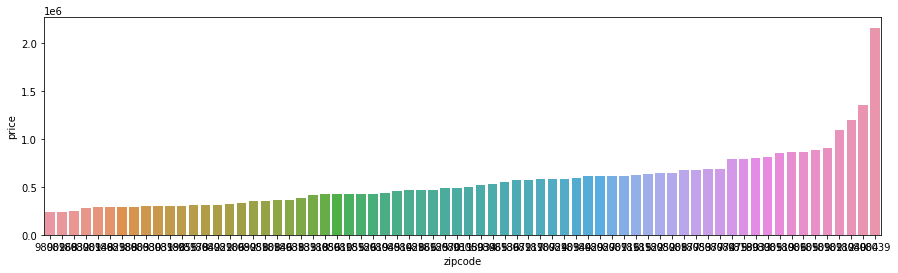

In [102]:
fig, axs = plt.subplots(figsize = (15,4));
sns.barplot(data= dfaux, x = "zipcode", y= "price",  order=dfaux.sort_values('price').zipcode, ax=axs);

In [103]:
print(f'Media de preço dos imoveis de zipcode maior é {round(2160606.60/234284.04, 2)} vezes maior do que a media do menor.')

Media de preço dos imoveis de zipcode maior é 9.22 vezes maior do que a media do menor.


### H5. Imóveis com latitudes mais baixa possuem preço em média mais alto.
<b>FALSO</b> Na verdade a latitude não segue uma tendência quanto aos preços, nem de alta nem de baixa.

In [104]:
# 5 quartiles
df4.sort_values('zipcode').zipcode.quantile([i / 5 for i in range(1, 5)])

0.2    98028.0
0.4    98053.0
0.6    98103.0
0.8    98125.0
Name: zipcode, dtype: float64

In [105]:
# separar age em 5 partes proporcionais
dfaux = df4[['zipcode', 'price']].loc[(df4['zipcode'] <= 98028.0)].groupby('zipcode').mean()
lat1 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['zipcode', 'price']].loc[(df4['zipcode'] > 98028.0) & (df4['zipcode'] <= 98053.0)].groupby('zipcode').mean()
lat2 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['zipcode', 'price']].loc[(df4['zipcode'] > 98053.0) & (df4['zipcode'] <= 98103.0 )].groupby('zipcode').mean()
lat3 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['zipcode', 'price']].loc[(df4['zipcode'] > 98103.0) & (df4['zipcode'] <= 98125.0 )].groupby('zipcode').mean()
lat4 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['zipcode', 'price']].loc[(df4['zipcode'] > 98125.0)].groupby('zipcode').mean()
lat5 = round(sum(dfaux['price'])/len(dfaux), 2)

# definir classes e labels
classes = [ lat1, lat2, lat3, lat4, lat5 ]
labels = ['lat1', 'lat2', 'lat3', 'lat4', 'lat5']

#preco medio
preco_medio = pd.DataFrame({'price(mean)': classes } , index = labels)

preco_medio.sort_values('price(mean)', ascending = False )


price(mean)
lat2    660173.23
lat4    636807.13
lat3    549052.10
lat1    538497.18
lat5    435799.57

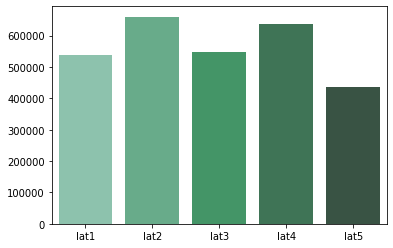

In [106]:
sns.barplot(labels, classes, palette="BuGn_d", data=preco_medio);

### H6. Imóveis mais novos possuem preços mais alto.
<b>FALSO</b> Não há uma relação tão direta entre o ano de construção e preço. Porém ao plotarmos o gráfico onde categorizamos os imóveis pelo ano de construção 'yr_built', precebemos que a categoria onde estão os imóveis posteriores a 2000 possuem sim preço em média mais caro. 

In [107]:
dfaux = round(df4[['yr_built', 'price']].groupby('yr_built').mean(), 2).reset_index()
dfaux.sort_values('price')

yr_built      price
43       1943  333373.47
44       1944  356322.08
42       1942  379290.50
69       1969  425408.59
61       1961  432213.07
..        ...        ...
9        1909  696135.16
101      2001  741030.80
5        1905  752977.99
115      2015  759785.16
33       1933  772050.00

[116 rows x 2 columns]

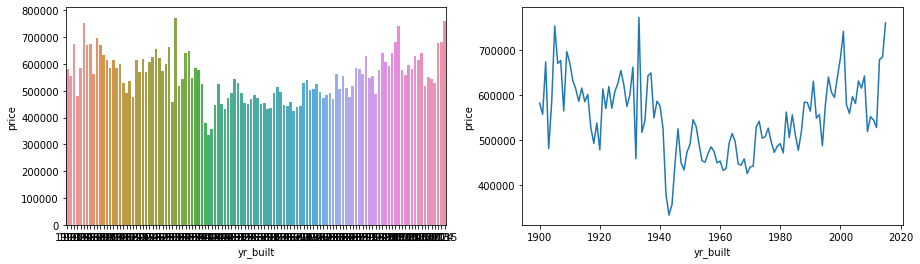

In [108]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(data= dfaux, x = "yr_built", y= "price", ax=axs[0]);
sns.lineplot(data= dfaux, x = "yr_built", y= "price", ax=axs[1]);

In [109]:
dfaux = round(df4[['house_age', 'price']].groupby('house_age').mean(), 2).reset_index()
dfaux.sort_values('price')

house_age      price
0  middle_house  512656.59
2     old_house  524799.04
1     new_house  618359.97

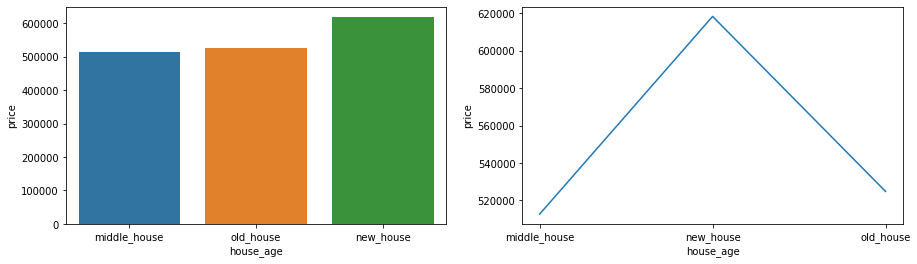

In [110]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(data= dfaux, x = "house_age", y= "price", order=dfaux.sort_values('price').house_age, ax=axs[0]);
sns.lineplot(data= dfaux, x = "house_age", y= "price", ax=axs[1]);

### H7. Imóveis que já foram reformados possuem preços mais alto.
<b>VERDADEIRO</b> Moveis reformados tem preço em média 1.43 vezes maior.

In [111]:
#colum reform, 1 ja teve reforma 0 nunca teve reforma
dfaux = df4[['price', 'yr_renovated']]
dfaux['reform'] = 'reform'
dfaux['reform'] = dfaux[ 'yr_renovated' ].apply( lambda x: 0      if x == 0
                                                 else      1   
                                                )
#media de preço
round(dfaux[['reform', 'price']].groupby('reform').mean().reset_index(), 2)

reform      price
0       0  530355.52
1       1  760379.03

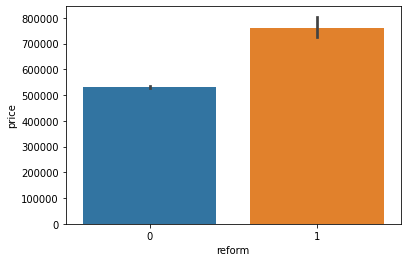

In [112]:
sns.barplot( data=dfaux, x= 'reform', y='price');

In [113]:
print(f'Media de preço dos imoveis reformados  é {round(760379.03/530355.52, 2)} vezes maior do que a media dos não reformados.')

Media de preço dos imoveis reformados  é 1.43 vezes maior do que a media dos não reformados.


### H8. Entre os imóveis que já foram reformados, só com data de reforma mais recente possuem preços mais alto.
<b>FALSO</b> Não a uma tendência clara na relação do ano que ocorreu a reforma com o preço do imóvel. 

In [114]:
dfaux = dfaux[dfaux['reform'] ==1]

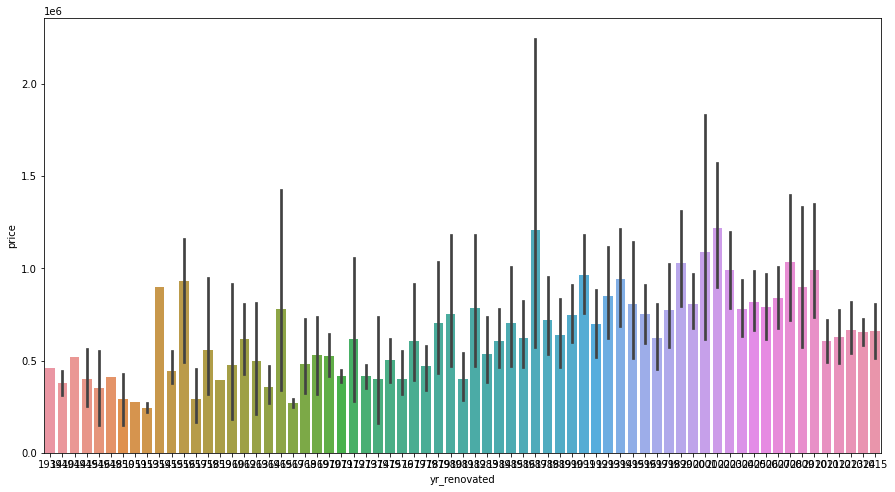

In [115]:
fig, axs = plt.subplots(figsize = (15,8));
sns.barplot(data= dfaux, x = "yr_renovated", y= "price", ax=axs);


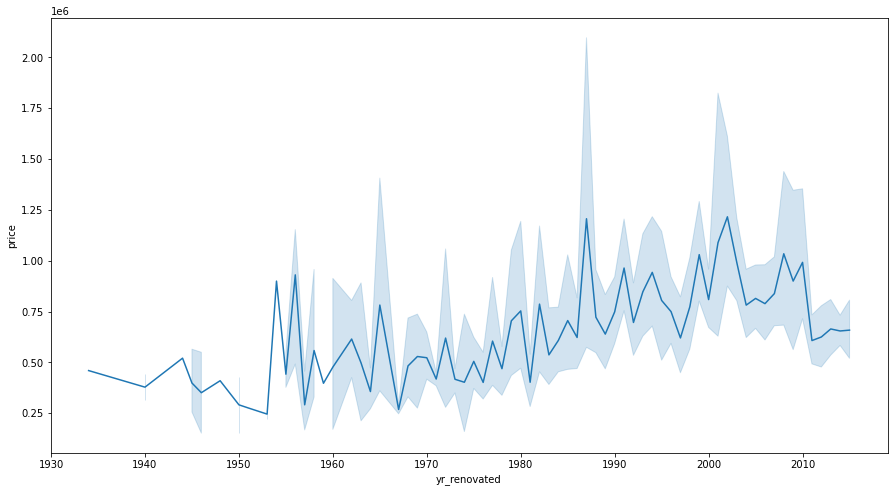

In [116]:
fig, axs = plt.subplots(figsize = (15,8));
sns.lineplot(data= dfaux, x = "yr_renovated", y= "price", ax=axs);

### H9. Imóveis com diferentes sazonalidades possuem diferença de preços expressivos. 
<b>FALSO</b> A diferença de sazonalidade não tem grande impacto nos preço dos imóveis. 

In [117]:
dfaux = round(df4[['season', 'price']].groupby('season').mean(), 2).reset_index()
dfaux.sort_values('price')

season      price
3  winter  519221.24
0    fall  530846.52
2  summer  546767.23
1  spring  552603.24

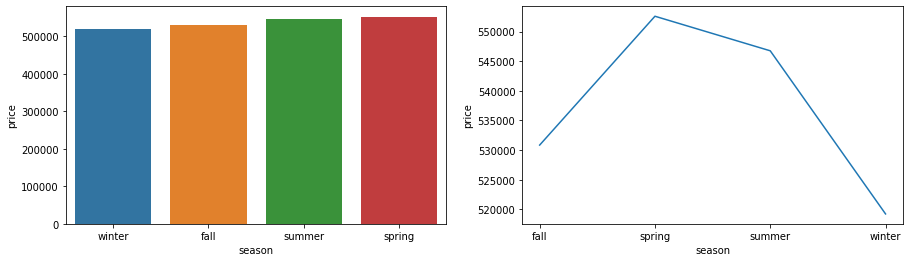

In [118]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(data= dfaux, x = "season", y= "price", order=dfaux.sort_values('price').season, ax=axs[0]);
sns.lineplot(data= dfaux, x = "season", y= "price", ax=axs[1]);

### H10. Imóveis com maior área de espaço interno, possuem preço mais alto.
<b>VERDADEIRO</b> AO plotar a relação preço por tamanho, não ficou tão claro a relação direta, porém ao separamos em grupos de mesmo tamanho usando a técnica de quartis, vemos que os grupos com casas maiores possuem maiores preços. 

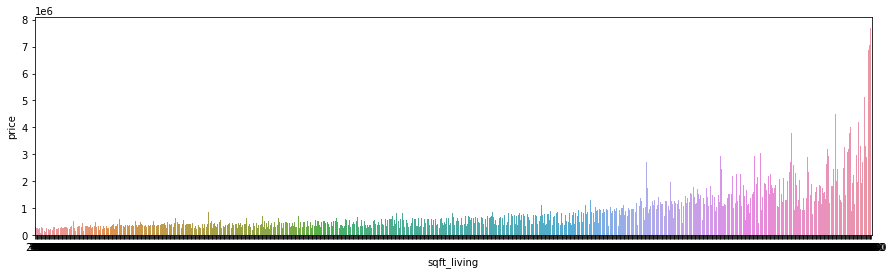

In [119]:
#ordenar por area
dfaux = round(df4[['sqft_living', 'price']].groupby('sqft_living').mean(), 2).reset_index()
dfaux.sort_values('sqft_living')

fig, axs = plt.subplots( figsize = (15,4));
sns.barplot(data= dfaux, x = "sqft_living", y= "price", ax=axs);


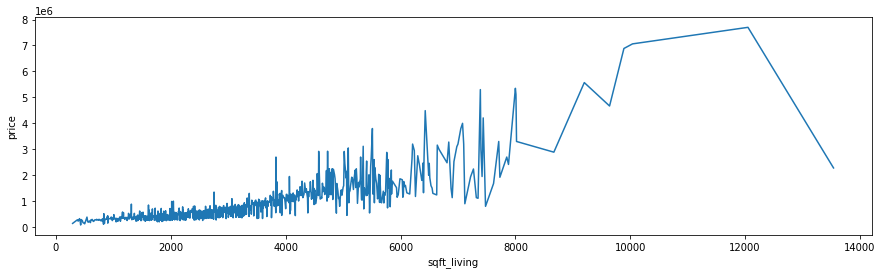

In [120]:
fig, axs = plt.subplots( figsize = (15,4));
sns.lineplot(data= dfaux, x = "sqft_living", y= "price", ax=axs);

In [121]:
# 5 quartiles
df4.sort_values('sqft_living').sqft_living.quantile([i / 5 for i in range(1, 5)])

0.2    1320.0
0.4    1710.0
0.6    2130.0
0.8    2730.0
Name: sqft_living, dtype: float64

In [122]:
# separar age em 5 partes proporcionais
dfaux = df4[['sqft_living', 'price']].loc[(df4['sqft_living'] <= 1320.0)].groupby('sqft_living').mean()
size1 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_living', 'price']].loc[(df4['sqft_living'] > 1320.0) & (df4['sqft_living'] <= 1710.0)].groupby('sqft_living').mean()
size2 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_living', 'price']].loc[(df4['sqft_living'] > 1710.0) & (df4['sqft_living'] <= 2130.0 )].groupby('sqft_living').mean()
size3 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_living', 'price']].loc[(df4['sqft_living'] > 2130.0) & (df4['sqft_living'] <= 2730.0 )].groupby('sqft_living').mean()
size4 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_living', 'price']].loc[(df4['sqft_living'] > 2730.0)].groupby('sqft_living').mean()
size5 = round(sum(dfaux['price'])/len(dfaux), 2)

# definir classes e labels
classes = [ size1, size2, size3, size4, size5 ]
labels = ['size1', 'size2', 'size3', 'size4', 'size5']

#preco medio
preco_medio = pd.DataFrame({'price(mean)': classes } , index = labels)

preco_medio.sort_values('price(mean)' )

price(mean)
size1    309464.94
size2    386084.75
size3    404768.50
size4    478429.40
size5   1313996.28

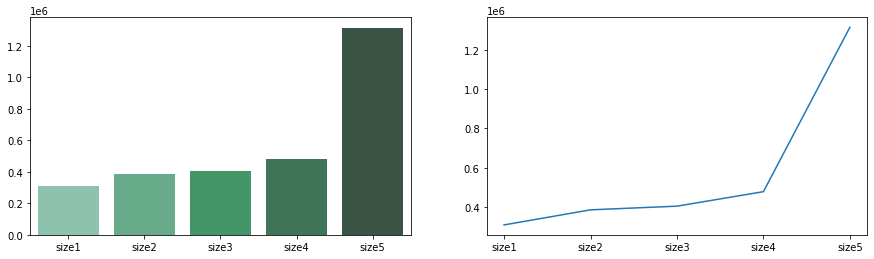

In [123]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(labels, classes, palette="BuGn_d", data=preco_medio, ax = axs[0]);
sns.lineplot(labels, classes, palette="BuGn_d", data=preco_medio, ax = axs[1]);

### H11. Imóveis com maior terreno possuem preço mais alto.
<b>FALSO</b> Não existe uma relação direta, apesar que ao separarmos em grupos iguais, o grupo com as casas com maior terrono em pés quadrados possuem maior preço em média, os outros grupos não seguiram uma lógica de relação terreno X preço bem definidos.

In [124]:
#ordenar por area
dfaux = round(df4[['sqft_lot', 'price']].groupby('sqft_lot').mean(), 2).reset_index()
dfaux.sort_values('sqft_lot')

sqft_lot      price
0          520   700000.0
1          572   250000.0
2          600   367500.0
3          609  1234570.0
4          635   256950.0
...        ...        ...
9777    982998   998000.0
9778   1024068   855000.0
9779   1074218   542500.0
9780   1164794   190000.0
9781   1651359   700000.0

[9782 rows x 2 columns]

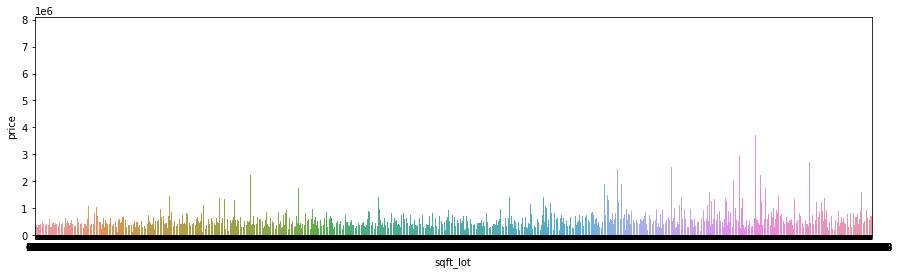

In [125]:
fig, axs = plt.subplots( figsize = (15,4));
sns.barplot(data= dfaux, x = "sqft_lot", y= "price", ax=axs);

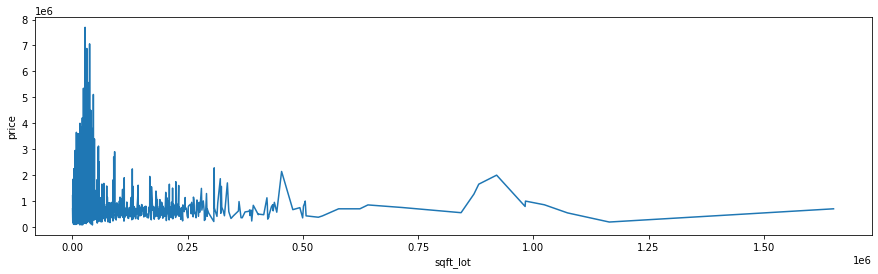

In [126]:
fig, axs = plt.subplots( figsize = (15,4));
sns.lineplot(data= dfaux, x = "sqft_lot", y= "price", ax=axs);

In [127]:
# 5 quartiles
df4.sort_values('sqft_lot').sqft_lot.quantile([i / 5 for i in range(1, 5)])

0.2     4644.0
0.4     6744.4
0.6     8520.6
0.8    12186.8
Name: sqft_lot, dtype: float64

In [128]:
# separar age em 5 partes proporcionais
dfaux = df4[['sqft_lot', 'price']].loc[(df4['sqft_lot'] <= 4644.0)].groupby('sqft_lot').mean()
size1 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_lot', 'price']].loc[(df4['sqft_lot'] > 4644.0) & (df4['sqft_lot'] <= 6744.4)].groupby('sqft_lot').mean()
size2 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_lot', 'price']].loc[(df4['sqft_lot'] > 6744.4) & (df4['sqft_lot'] <= 8520.6 )].groupby('sqft_lot').mean()
size3 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_lot', 'price']].loc[(df4['sqft_lot'] > 8520.6) & (df4['sqft_lot'] <= 12186.8 )].groupby('sqft_lot').mean()
size4 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_lot', 'price']].loc[(df4['sqft_lot'] > 12186.8)].groupby('sqft_lot').mean()
size5 = round(sum(dfaux['price'])/len(dfaux), 2)

# definir classes e labels
classes = [ size1, size2, size3, size4, size5 ]
labels = ['size1', 'size2', 'size3', 'size4', 'size5']

#preco medio
preco_medio = pd.DataFrame({'price(mean)': classes } , index = labels)

preco_medio.sort_values('price(mean)' )

price(mean)
size3    472154.75
size1    482585.27
size2    508937.17
size4    536626.19
size5    720187.79

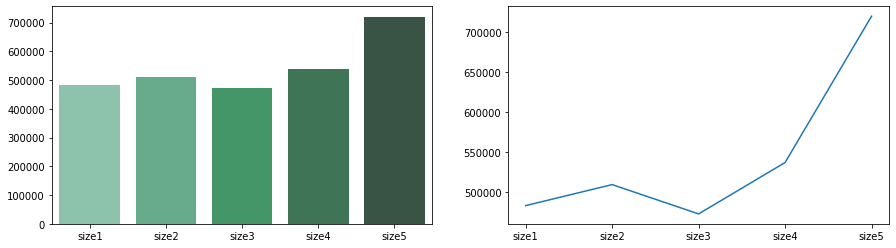

In [129]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(labels, classes, palette="BuGn_d", data=preco_medio, ax = axs[0]);
sns.lineplot(labels, classes, palette="BuGn_d", data=preco_medio, ax = axs[1]);

### H12. Imóveis com mais quartos possuem preço mais alto.
<b>Verdadeiro</b> Apesar do gráfico não mostrar uma relação direta, pois depois de 8 quartos o preço médio cai, verifica-se que tem apenas 10 imóveis com mais de 8 quartos, o que é estatisticamente um número muito pequeno para termos alguma conclusão. E apenas 13 imóveis com 0 quartos, retirando estes imóveis 20 imóveis da analise a tendência é clara mostra uma relação forte com o número de quarto e preço. 

In [130]:
dfaux = round(df4[['bedrooms', 'price']].groupby('bedrooms').mean(), 2).reset_index()
dfaux.sort_values('price')

bedrooms       price
1          1   317642.88
2          2   401372.68
0          0   409503.85
3          3   466232.08
11        11   520000.00
4          4   635419.50
5          5   786599.83
10        10   819333.33
6          6   825520.64
9          9   893999.83
7          7   951184.66
8          8  1105076.92

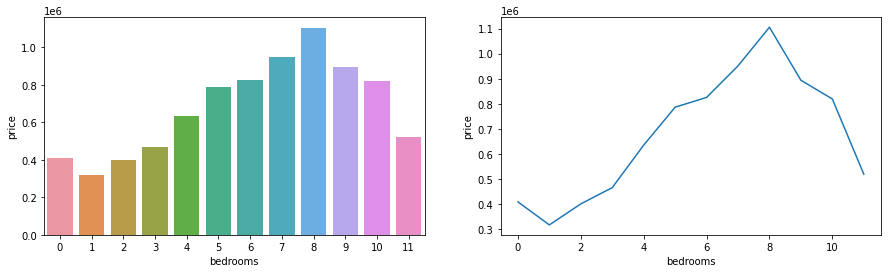

In [131]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(data= dfaux, x = "bedrooms", y= "price", ax=axs[0]);
sns.lineplot(data= dfaux, x = "bedrooms", y= "price", ax=axs[1]);

In [132]:
print(f'Total de imóveis com mais de 8 quartos: {len(df4.loc[df4["bedrooms"]>8])}')
print(f'Total de imóveis com 0 quartos: {len(df4.loc[df4["bedrooms"]==0])}')

Total de imóveis com mais de 8 quartos: 10
Total de imóveis com 0 quartos: 13


In [133]:
dfaux = round(df4[['dormitory_type', 'price']].groupby('dormitory_type').mean(), 2).reset_index()
dfaux.sort_values('price')

dormitory_type      price
2         studio  323275.87
0      apartment  452006.72
1          house  671018.37

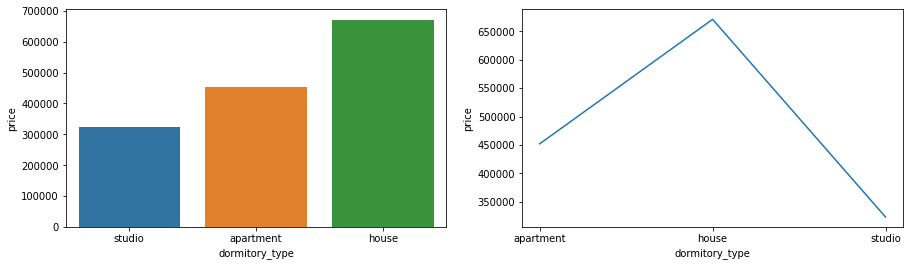

In [134]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(data= dfaux, x = "dormitory_type", y= "price", order=dfaux.sort_values('price').dormitory_type, ax=axs[0]);
sns.lineplot(data= dfaux, x = "dormitory_type", y= "price",  ax=axs[1]);

### H13. Imóveis com mais banheiros possuem preço mais alto.
<b>VERDADEIRO</b> O preço medio dos imóveis tem uma tendencia crescente com o aumento do número de banheiros. Foi verificado que algumas quantidades de banheiro, que não seguem esta lógica, possuem muito pouco por vezes apenas um imóvel, sem dados suficientes para uma amostragem média de preços. 

In [135]:
dfaux = round(df4[['bathrooms', 'price']].groupby('bathrooms').mean(), 2).reset_index()
dfaux.sort_values('price')

bathrooms       price
1        0.50   237375.00
2        0.75   294520.86
3        1.00   347041.24
5        1.50   409322.21
0        0.00   448160.00
27       7.50   450000.00
6        1.75   454835.35
7        2.00   457889.72
8        2.25   533676.77
9        2.50   553596.50
4        1.25   621216.67
10       2.75   660230.35
11       3.00   708415.23
13       3.50   931933.15
12       3.25   970339.78
14       3.75  1197216.90
15       4.00  1267709.32
17       4.50  1333620.21
16       4.25  1525774.43
19       5.00  1673491.90
25       6.50  1709445.00
20       5.25  1817176.92
18       4.75  2021303.91
22       5.75  2492500.00
21       5.50  2522300.00
26       6.75  2734000.00
23       6.00  2946833.33
24       6.25  3094000.00
29       8.00  4990000.00
28       7.75  6885000.00

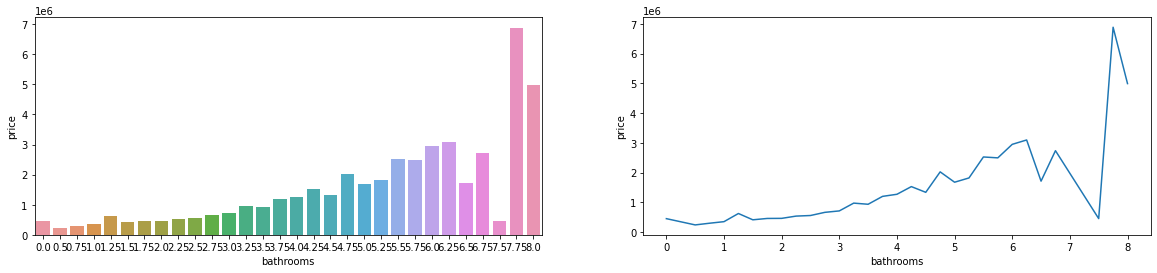

In [136]:
fig, axs = plt.subplots(ncols= 2, figsize = (20,4));
sns.barplot(data= dfaux, x = "bathrooms", y= "price", ax=axs[0]);
sns.lineplot(data= dfaux, x = "bathrooms", y= "price", ax=axs[1]);

In [137]:
len(df4.loc[df4.bathrooms >5 ])

43

### H14. Imóveis que possuem porão possuem preço mais alto.
<b>VERDADEIRO</b> Imóveis que possuem porão possuem em médio preço maior que as que não possuem. Esta relação é de 1.28 vezes maior.

In [138]:
#colum reform, 1 ja teve reforma 0 nunca teve reforma
dfaux = df4[['price', 'sqft_basement']]
dfaux['basement'] = 'basement'
dfaux['basement'] = dfaux[ 'sqft_basement' ].apply( lambda x: 0      if x == 0
                                                 else      1   
                                                )
#media de preço
round(dfaux[['basement', 'price']].groupby('basement').mean().reset_index(), 2)

basement      price
0         0  486884.09
1         1  622371.49

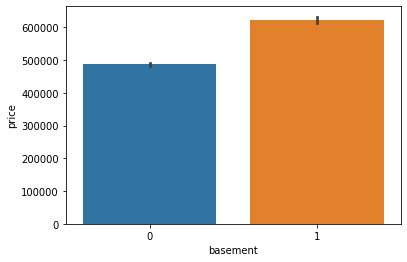

In [139]:
sns.barplot( data=dfaux, x= 'basement', y='price');

In [140]:
print(f'O preço média das casas que possuem porão é {round(622371.49/486884.09, 2)} vezes maior que as que não possuem.')

O preço média das casas que possuem porão é 1.28 vezes maior que as que não possuem.


### H15. Imóveis que possuem porão, os com maior porão possuem preços mais altos.
<b>VERDADEIRO</b> Imóveis com maiores porões tem uma tendencia de ter preços maiores. Apesar de não ter ficado muito visivel esta relação quando plotado todos os tamanhões de porões de forma independênte, ao agruparmos em proporçoes iguais, vemos que os grupos com tamanho de porões maiores possuem preços medios maiores.

In [141]:
dfaux = dfaux.loc[dfaux.basement == 1]

In [142]:
dfaux 

price  sqft_basement  basement
1       538000.0            400         1
3       604000.0            910         1
5      1225000.0           1530         1
8       229500.0            730         1
10      662500.0           1700         1
...          ...            ...       ...
21588   414500.0            190         1
21590  1222500.0           1800         1
21595   520000.0             50         1
21606  1007500.0            910         1
21607   475000.0            130         1

[8486 rows x 3 columns]

In [143]:
dfaux = round(df4[['sqft_basement', 'price']].groupby('sqft_basement').mean(), 2).reset_index()
dfaux.sort_values('price')

sqft_basement      price
1               10   191900.0
21             176   250000.0
109            768   262500.0
72             506   269000.0
53             374   280000.0
..             ...        ...
305           4820  4668000.0
285           2390  5300000.0
300           3000  5570000.0
284           2360  7062500.0
302           3480  7700000.0

[306 rows x 2 columns]

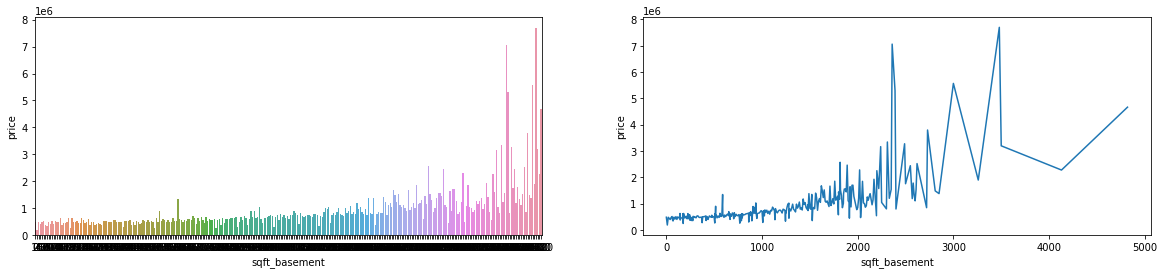

In [144]:
fig, axs = plt.subplots(ncols= 2, figsize = (20,4));
sns.barplot(data= dfaux, x = "sqft_basement", y= "price", ax=axs[0]);
sns.lineplot(data= dfaux, x = "sqft_basement", y= "price", ax=axs[1]);

In [145]:
# 5 quartiles
dfaux.sort_values('sqft_basement').sqft_basement.quantile([i / 5 for i in range(1, 5)])

0.2     420.0
0.4     861.0
0.6    1320.0
0.8    1870.0
Name: sqft_basement, dtype: float64

In [146]:
# separar age em 5 partes proporcionais
dfaux = df4[['sqft_basement', 'price']].loc[(df4['sqft_basement'] <= 420.0)].groupby('sqft_basement').mean()
size1 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_basement', 'price']].loc[(df4['sqft_basement'] > 420.0) & (df4['sqft_basement'] <= 861.0)].groupby('sqft_basement').mean()
size2 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_basement', 'price']].loc[(df4['sqft_basement'] > 861.0) & (df4['sqft_basement'] <= 1320.0 )].groupby('sqft_basement').mean()
size3 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_basement', 'price']].loc[(df4['sqft_basement'] > 1320.0) & (df4['sqft_basement'] <= 1870.0 )].groupby('sqft_basement').mean()
size4 = round(sum(dfaux['price'])/len(dfaux), 2)
dfaux = df4[['sqft_basement', 'price']].loc[(df4['sqft_basement'] > 1870.0)].groupby('sqft_basement').mean()
size5 = round(sum(dfaux['price'])/len(dfaux), 2)

# definir classes e labels
classes = [ size1, size2, size3, size4, size5 ]
labels = ['size1', 'size2', 'size3', 'size4', 'size5']

#preco medio
preco_medio = pd.DataFrame({'price(mean)': classes } , index = labels)

preco_medio.sort_values('price(mean)' )

price(mean)
size1    465804.59
size2    551117.34
size3    697660.31
size4   1097947.50
size5   1899610.00

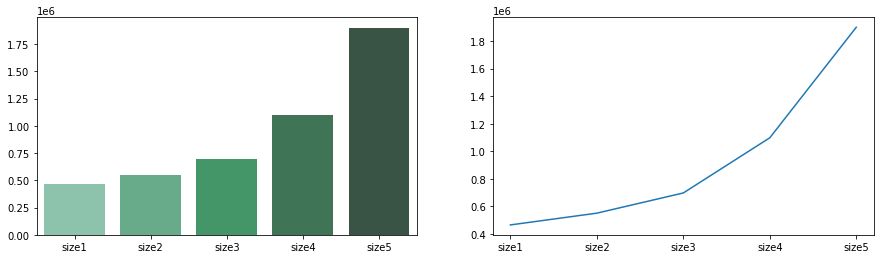

In [147]:
fig, axs = plt.subplots(ncols= 2, figsize = (15,4));
sns.barplot(labels, classes, palette="BuGn_d", data=preco_medio, ax = axs[0]);
sns.lineplot(labels, classes, palette="BuGn_d", data=preco_medio, ax = axs[1]);

In [148]:
# 5 quartiles
df4.sort_values('price').price.quantile([i / 5 for i in range(1, 5)])

0.2    298460.0
0.4    399500.0
0.6    518800.0
0.8    700144.0
Name: price, dtype: float64

In [149]:
# separar age em 5 partes proporcionais
dfaux = df4[['sqft_living', 'price', 'bathrooms']].loc[(df4['price'] <= 298460.0)].groupby('price').mean()
size1 = round(sum(dfaux['sqft_living'])/len(dfaux), 2)
dfaux = df4[['sqft_living', 'price', 'bathrooms']].loc[(df4['price'] > 298460.0) & (df4['price'] <= 399500.0)].groupby('price').mean()
size2 = round(sum(dfaux['sqft_living'])/len(dfaux), 2)
dfaux = df4[['sqft_living', 'price', 'bathrooms']].loc[(df4['price'] > 399500.0) & (df4['price'] <= 518800.0 )].groupby('price').mean()
size3 = round(sum(dfaux['sqft_living'])/len(dfaux), 2)
dfaux = df4[['sqft_living', 'price', 'bathrooms']].loc[(df4['price'] > 518800.0) & (df4['price'] <= 700144.0 )].groupby('price').mean()
size4 = round(sum(dfaux['sqft_living'])/len(dfaux), 2)
dfaux = df4[['sqft_living', 'price', 'bathrooms']].loc[(df4['price'] > 700144.0)].groupby('price').mean()
size5 = round(sum(dfaux['sqft_living'])/len(dfaux), 2)

# definir classes e labels
classes = [ size1, size2, size3, size4, size5 ]
labels = ['size1', 'size2', 'size3', 'size4', 'size5']

#preco medio
preco_medio = pd.DataFrame({'price(mean)': classes } , index = labels)

preco_medio.sort_values('price(mean)' )

price(mean)
size1      1347.62
size2      1781.79
size3      1912.27
size4      2223.29
size5      3394.88

### H16 Imóvies com vista para água e com area interna grande possuem relação de valorização maior. 
<b>VERDADEIRO</b> Afirmativa verdadeira, o grafico possui sim uma tendência crescente do preço nos imóveis com vista para água com área interna maior.  


In [170]:
#ordenar por area
dfaux1 = round(df4[['sqft_living', 'price']].loc[df4.waterfront == 1 ].groupby('sqft_living').mean(), 2).reset_index()
dfaux1.sort_values('sqft_living')

#fig, axs = plt.subplots( figsize = (15,4));
#sns.barplot(data= dfaux, x = "sqft_living", y= "price", ax=axs);


sqft_living      price
0            440   290000.0
1            720   570000.0
2            760   369900.0
3            830   385000.0
4            840   528000.0
..           ...        ...
135         7000  3200000.0
136         7390  5300000.0
137         8010  5110800.0
138         9640  4668000.0
139        10040  7062500.0

[140 rows x 2 columns]

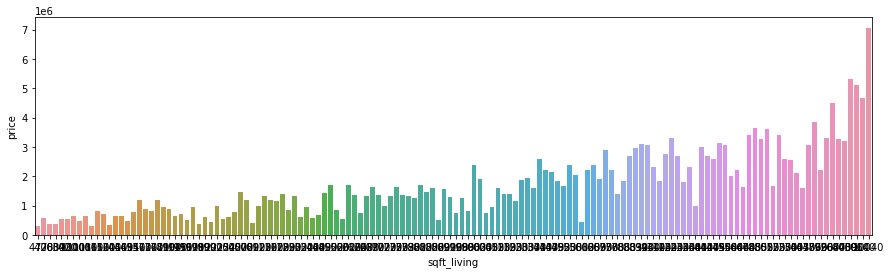

In [153]:
fig, axs = plt.subplots( figsize = (15,4));
sns.barplot(data= dfaux1, x = "sqft_living", y= "price", ax=axs);

### H17 Dos imóveis com vista para água, possuem grandes variações de preços quando em zipcodes diferentes
<b>VERDADEIRO</b> A uma grande variação de preço nos grupos de imóveis com vista para água em diferentes zipcodes.

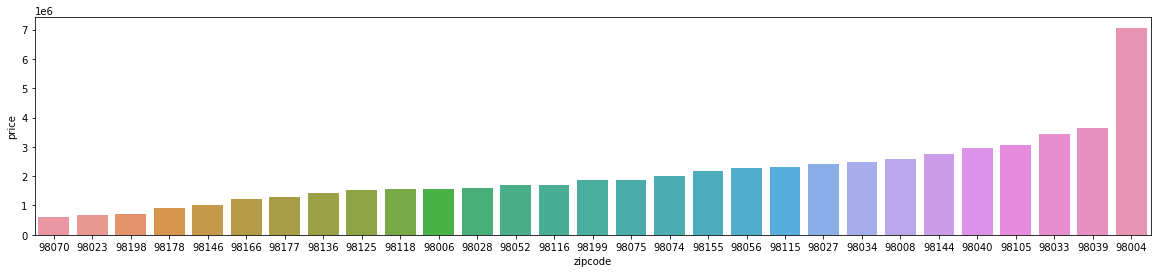

In [154]:
dfaux2 = round(df4[['zipcode', 'price']].loc[df4.waterfront == 1 ].groupby('zipcode').mean(), 2).reset_index()
fig, axs = plt.subplots(figsize = (20,4));
sns.barplot(data= dfaux2, x = "zipcode", y= "price",  order=dfaux2.sort_values('price').zipcode, ax=axs);

## 4.3. Multivariate Analysis

In [155]:
time_atributes = df4[['price', 'date', 'yr_built', 'yr_renovated', 'year' ]]
size_atributes = df4[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15' ]] 
quality_atributes = df4[['price','condition', 'grade' ]]
localization_atributes = df4[['price', 'zipcode', 'lat', 'long','waterfront']]


> Foi separados em grupos para ficar melhor a visualização das matrizes correlação.

> Para ter um parâmetro de comparação vou considerar correlação forte qualquer correlação acima de 0.5, media de 0.1 a 0.5 e fraca a baixo de 0.1

### - Time Atributes

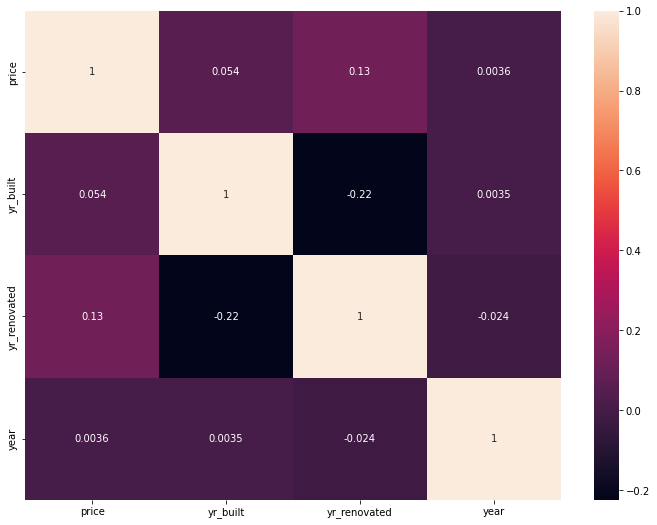

In [156]:
fig = plt.subplots(figsize = (12,9))
sns.heatmap(time_atributes.corr(), annot = True);

Grau de correlação com o preço:

- Correlação forte:

- Correlação moderada: yr_renovated(0.13)

- Correlação fraca: yr_built(0.054), year(0.036) 

### - Size Atributes

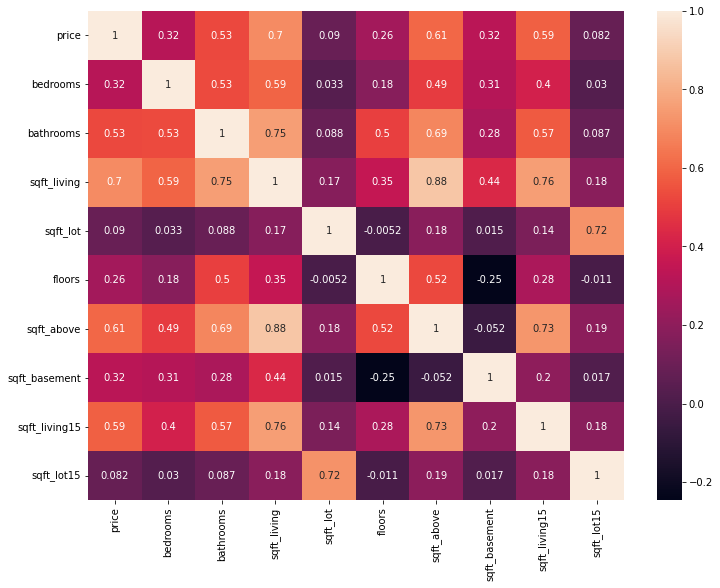

In [157]:
fig = plt.subplots(figsize = (12,9))
sns.heatmap(size_atributes.corr(), annot = True);

Grau de correlação com o preço:

- Correlação forte: bathrooms(0.53), sqft_living(0.7), sqft_above(0.61), sqft_living15(0.59)

- Correlação moderada: bedrooms(0.32), floors(0.26), sqft_basement(0.32)

- Correlação fraca: sqft_lot(0.09), sqft_lot15(0.082)

### - Quality Atributes

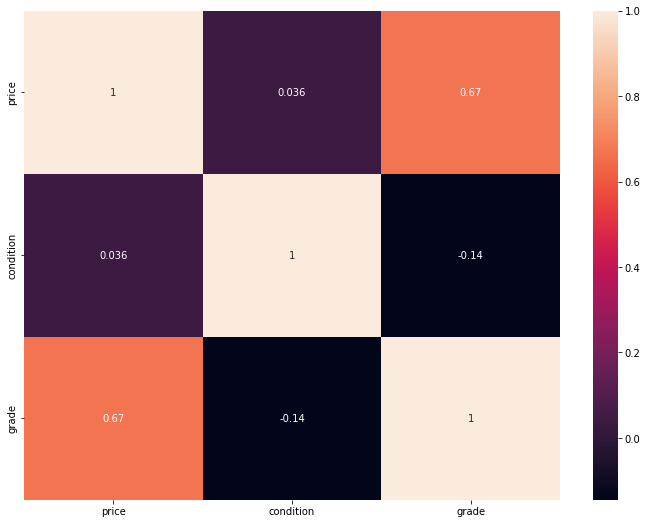

In [158]:
fig = plt.subplots(figsize = (12,9))
sns.heatmap(quality_atributes.corr(), annot = True);

Grau de correlação com o preço:

- Correlação forte: grade(0.67)

- Correlação moderada: 

- Correlação fraca: condition(0.036)

### - Localization Atributes

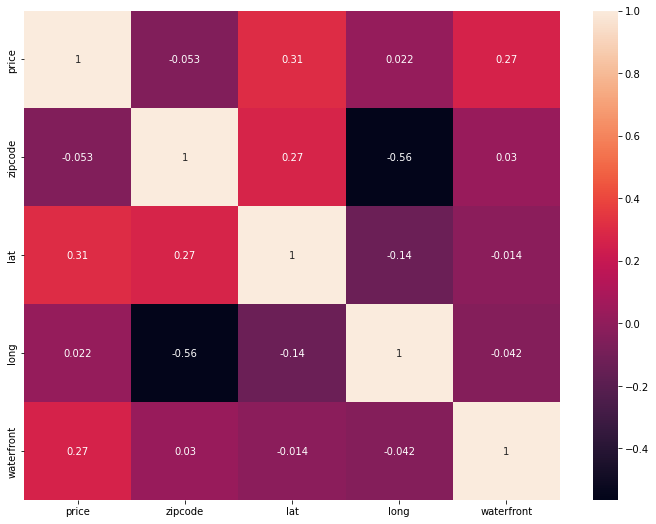

In [159]:
fig = plt.subplots(figsize = (12,9))
sns.heatmap(localization_atributes.corr(), annot = True);

Grau de correlação com o preço:

- Correlação forte: zipcode(-0.53)

- Correlação moderada: lat(0.31), waterfront(0,27)

- Correlação fraca: long(0.022)

### - Ordered Correlation Table With Price

In [160]:
index = ['yr_renovated', 'yr_built' , 'year' , 'bathrooms' , 'sqft_living',
            'sqft_above' , 'sqft_living15' , 'bedrooms', 'floors' , 
            'sqft_basement' , 'sqft_lot' , 'sqft_lot15','waterfront', 'grade', 'zipcode']
valores = [0.13, 0.054,  0.036,  0.53,  0.7,
             0.61,  0.59,  0.32,  0.26, 
             0.32,  0.09,  0.082, 0.27, 0.67, 0.52]

oc_table = pd.DataFrame({ 'correlation_value' : valores }, index = index).sort_values('correlation_value', ascending=False ).reset_index()
oc_table




index  correlation_value
0     sqft_living              0.700
1           grade              0.670
2      sqft_above              0.610
3   sqft_living15              0.590
4       bathrooms              0.530
5         zipcode              0.520
6        bedrooms              0.320
7   sqft_basement              0.320
8      waterfront              0.270
9          floors              0.260
10   yr_renovated              0.130
11       sqft_lot              0.090
12     sqft_lot15              0.082
13       yr_built              0.054
14           year              0.036

### - Cross Correlation

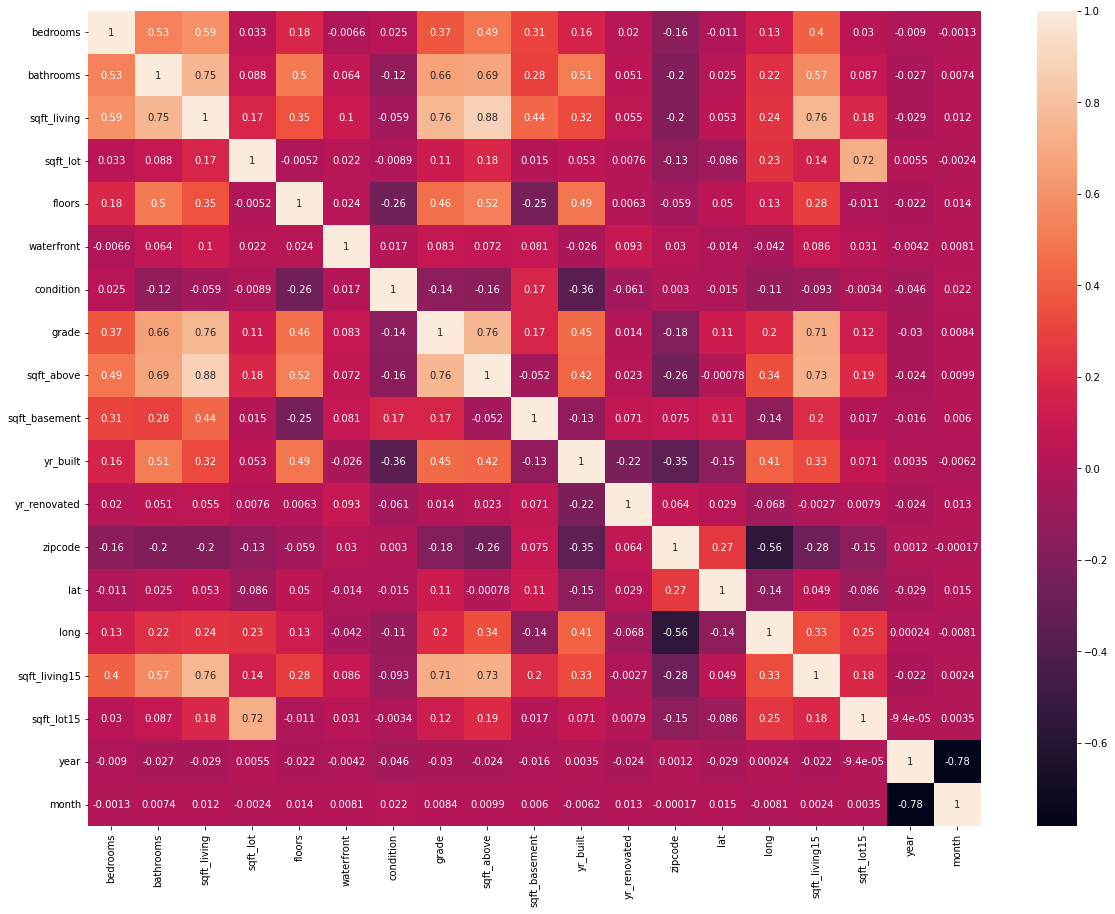

In [161]:
dfcc  = df4.copy()
dfcc.drop(['id'], axis='columns', inplace=True )
dfcc.drop(['price'], axis='columns', inplace=True )
fig = plt.subplots(figsize = (20,15))
sns.heatmap(dfcc.corr(), annot = True);

Correlações Cruzadas Fortes:

    - sqft_living   x bathrooms (0.75)
    
    - sqft_living   x grade (0,76)
    
    - sqft_living   x sqft_above(0,88)   
    
    - sqft_living   x sqft_living15(0,76)   
    
    - sqft_lot15    x sqft_lot(0,72)
    
    - sqft_living15 x grade(0,71)
    
    - grade         x sqft_above(0,76)    
    
    - sqft_above    x sqft_living15(0,73)
    

## 4.4 Property Location Map

In [162]:
#Definindo variáveis que serão mostradas no mapa
data_map = df4[['id', 'lat', 'long', 'price']]

#Parâmetros do mapa, tamanho dos pontos definido por preço
map_ = px.scatter_mapbox( data_map, lat= 'lat', lon= 'long' , hover_name= 'id', 
               hover_data= ['price'], 
               color_continuous_scale = px.colors.cyclical.IceFire, 
               zoom=3, height = 300, size= 'price',
              )

#Confiturações de layout 
map_.update_layout( mapbox_style = 'open-street-map')
map_.update_layout( height = 600, margin ={'r': 0, 't':0, 'l':0, 'b': 0  })

#Salva mapa criado
map_.write_html( 'data/map_houses_rocket.html')

map_.show()

# 5.0.  Business Performance

In [163]:
df5 = df4.copy()

## 5.1 Purchase Indication Table

### Strategy

> A estratégia definida para encontrar boas oportunidades a partir do insigths obtidos no estudo e exploração dos dados foi:   

- 1. Criar uma coluna chamada "score_price" onde será feita uma graduação levando em conta as principais features que valorizam um imóvel, estas definidas durante o processo de analise dos dados. 

- 2. Criar coluna com preço da mediana de cada região. 

- 3. Criar coluna o status de sugestão de compra ou não do imóvel. Onde os critérios é, score favorável e preço 10% menor que a mediana da região, status favorável a compra, se não não favorável a compra. 


### Score Price

> Para definir um score de potencial de preço para cada imóvel, foi definido valor a serem adicionadoas a este score dadas as carácteristica principais que valorizam um imóvel estas definidas depois de um estudo e analise dos dados. 

- score_living: De 1 a 5, onde foram separados proporcionalmente em 5 grupos de tamanho de imóveis. Dando pontução maior para móveis com maior área interno.

- score_grade : De 0 a 2, onde foram definidos conforme analise que percebeu que valorizações eram maiores em grades superiores a 8 e mais baixas quando inferiores a 3. 

- score_waterfront: De 0 a 3 onde 0 para não ter vista para água e 3 para imóveis com vista. 

- score_renovated: De 0 a 2, onde 0 quando não teve reforma e 1 para imóveis reformados. 

- score_bedrooms: De 0 a 2 onde separou-se em menos de 4 quartos, 4 a 6 e 7 ou mais. 

- score_bathrooms: De 0 a 2 onde separou-se em menos de 3, 3 a 5 e 6 ou mais.

- score_basement: De 0 a 1, onde 0 para imóveis que não possuem porão e 1 para os que possuem. 


In [171]:

#score living
df5[ 'score_living' ] = df5 ['sqft_living'].apply( lambda x: 1 if x <= 1320.0
                                                 else      2 if (x> 1320.0) & (x<= 1710.0)
                                                 else      3 if (x>1710.0 ) & (x <= 2130.0) 
                                                 else      4 if (x>12130.0 ) & (x <= 2730.0) 
                                                 else      5 if (x>2730.0 ) 
                                                 else      0
                                                  
                                               )
#score grade
df5[ 'score_grade' ] = df5 ['grade'].apply( lambda x: 1 if (x > 3) &  (x <=8)
                                                 else   2 if x > 8
                                                 else   0
                                                  
                                               )

#score waterfront
df5[ 'score_waterfront' ] = df5 ['waterfront'].apply( lambda x: 3 if (x == 1)
                                                 else   0
                                                  
                                               )
#score renovated
df5[ 'score_renovated' ] = df5 ['yr_renovated'].apply( lambda x: 2 if (x != 0)
                                                 else   0
                                                  
                                               )

#score bedrooms
df5[ 'score_bedrooms' ] = df5 ['bedrooms'].apply( lambda x: 1 if (x > 3) &  (x <=6)
                                                 else   2 if x > 6
                                                 else   0
                                                )


#score bathrooms
df5[ 'score_bathrooms' ] = df5 ['bathrooms'].apply( lambda x: 1 if (x >= 3) &  (x <6)
                                                 else   2 if x > 5
                                                 else   0
                                                )

#score basement
df5[ 'score_basement' ] = df5 ['sqft_basement'].apply( lambda x: 2 if (x != 0)
                                                 else   0                                               
                                                )
#score price
df5['score_price'] = df5[ 'score_living' ] + df5[ 'score_grade' ] + df5[ 'score_waterfront' ] + df5[ 'score_renovated' ] + df5[ 'score_bedrooms' ] + df5[ 'score_bathrooms' ]  + df5[ 'score_basement' ]

#df5['score_price'] = df5 ['condition'].apply( lambda x:  0 if (x <= 2)
#                                                 else  x                                                
#                                                )

#daframe score
df5 = df5.reset_index(drop=True)
df5_score = df5[['id','lat', 'long', 'zipcode', 'price', 'score_price']]

df5_score.sort_values('score_price', ascending = False).sample(10)

id      lat     long  zipcode      price  score_price
5158   4443800415  47.6848 -122.392    98117   475000.0            2
10184  7880020030  47.4872 -122.066    98027   725000.0            8
4743     31000165  47.5738 -122.215    98040  1490000.0           13
6699   2121000250  47.7313 -122.229    98034   303500.0            2
7927    924059233  47.5830 -122.170    98005   659000.0            2
18707   925069042  47.6707 -122.045    98053   713000.0            8
8767   7812800515  47.4971 -122.240    98178   159075.0            6
9141   1523059100  47.4809 -122.153    98059   320000.0            5
10655  9828701741  47.6210 -122.298    98112   489000.0            5
13639  7853302110  47.5415 -121.884    98065   469900.0            1

### Median zipcode

In [173]:
#Median price per zipcode
df5_score['median_zipcode'] = 0
for i in range(len(df5_score) ):
    zipvalor = df5_score['zipcode'][i]
    df5_score['median_zipcode'][i] = round(df5_score[df5['zipcode'] == zipvalor ].price.median(), 2)
df5_score.head()                                           

id      lat     long  zipcode     price  score_price  \
0  7129300520  47.5112 -122.257    98178  221900.0            2   
1  6414100192  47.7210 -122.319    98125  538000.0            5   
2  5631500400  47.7379 -122.233    98028  180000.0            2   
3  2487200875  47.5208 -122.393    98136  604000.0            8   
4  1954400510  47.6168 -122.045    98074  510000.0            3   

  purchase_status  median_zipcode  
0             NOK        278277.0  
1             NOK        425000.0  
2             NOK        445000.0  
3             NOK        489950.0  
4             NOK        642000.0

### Purchase Status 

In [175]:
#Status de compra
df5_score['purchase_status'] = 'NOK'
for i in range( len(df5_score )):
    if (df5_score['score_price'][i] > 7) & (df5_score['price'][i] < df5_score['median_zipcode'][i]*0.9):
        df5_score['purchase_status'][i] = 'OK'

df5_score.sample(20)

id      lat     long  zipcode      price  score_price  \
16636  6802200190  47.1955 -121.987    98022   222500.0            3   
14476  7857001225  47.5497 -122.295    98108   320000.0            5   
11348  3046200125  47.4807 -122.332    98168   202000.0            2   
7426   2524000050  47.5614 -122.215    98040  1393000.0           10   
4486   1724069059  47.5682 -122.059    98075  2000000.0           12   
6408   6338000592  47.6700 -122.284    98105   565000.0            5   
16875  3501100280  47.6926 -122.365    98117   460000.0            2   
14362  3630180450  47.5395 -121.997    98027   800000.0            8   
3578   3459100300  47.7743 -122.270    98155   405000.0            6   
3215    868001295  47.7045 -122.379    98177   650000.0            5   
5446   7645900235  47.5771 -122.380    98126   880000.0            4   
12836  1154100205  47.7553 -122.283    98155   305000.0            4   
6256   8087800480  47.6544 -122.134    98052   480000.0            7   
18001  7518506716  47.6798 -122.385    98117   969950.0            7   
12426  7680400140  47.4549 -122.363    98166   710000.0           10   
12614  7202430150  47.6649 -122.135    98052   740000.0            8   
15533  2924069132  47.5406 -122.066    98027   527500.0            3   
10167  7517500310  47.6626 -122.361    98107   775000.0            3   
4863    629500170  47.5835 -121.996    98075   679950.0            8   
17873   782700120  47.7077 -121.914    98019   334200.0            3   

      purchase_status  median_zipcode  
16636             NOK        279500.0  
14476             NOK        342500.0  
11348             NOK        235000.0  
7426              NOK        993750.0  
4486              NOK        739999.0  
6408              NOK        675000.0  
16875             NOK        544000.0  
14362             NOK        570500.0  
3578              NOK        375000.0  
3215              NOK        554000.0  
5446              NOK        395750.0  
12836             NOK        375000.0  
6256              NOK        615000.0  
18001             NOK        544000.0  
12426             NOK        390000.0  
12614             NOK        615000.0  
15533             NOK        570500.0  
10167             NOK        529950.0  
4863              NOK        739999.0  
17873             NOK        401250.0

## 5.2 Business Questions

<b> Quais são os Imóveis que a House Rockets deveria comprar e por qual preço?</b>

> Os imóveis que a House Rockets deveria comprar são os imóvies que estão com preço com preço inferior a 10% da mediana dos preços que possuem mairo potencial de valorização segundo o score feito a partir da avaliação da analise de dados feitas. 

> A baixo fizemos uma lista com os imóveis indicados em ordenados pelo score de preço esta lista foi salva para poder ser avaliada pela empresa e pesquisada no Dashboard.  

> O preço de venda sugerido é de 10% a 30% o de compra, dependendo da sazonalidade que será vendido.

In [167]:
df_purchase = df5_score.loc[df5_score['purchase_status'] == 'OK'].sort_values('score_price', ascending = False)
df_purchase

id      lat     long  zipcode      price  score_price  \
13235  3262300322  47.6293 -122.238    98039  1651000.0           13   
18534  3667500015  47.6192 -122.307    98112   770000.0           13   
19107  2025059131  47.6322 -122.203    98004   980000.0           12   
18574  8935100100  47.6763 -122.282    98115   476000.0           12   
1660   9126101740  47.6086 -122.303    98122   490000.0           11   
...           ...      ...      ...      ...        ...          ...   
10687  7011200160  47.6389 -122.371    98119   595000.0            8   
10607   125059179  47.6798 -122.104    98052   510000.0            8   
10213  2553300270  47.5857 -122.027    98075   649000.0            8   
9742    686900030  47.6354 -122.196    98004   999950.0            8   
21578  7011201004  47.6374 -122.369    98119   645000.0            8   

       median_zipcode purchase_status  
13235       1892500.0              OK  
18534        915000.0              OK  
19107       1150000.0              OK  
18574        567000.0              OK  
1660         572000.0              OK  
...               ...             ...  
10687        744975.0              OK  
10607        615000.0              OK  
10213        739999.0              OK  
9742        1150000.0              OK  
21578        744975.0              OK  

[165 rows x 8 columns]

### Indicated Properties Map 

In [168]:
#Definindo variáveis que serão mostradas no mapa
data_map = df_purchase[['id', 'lat', 'long', 'price']]

#Parâmetros do mapa, tamanho dos pontos definido por preço
map_ = px.scatter_mapbox( data_map, lat= 'lat', lon= 'long' , hover_name= 'id', 
               hover_data= ['price'], 
               color_continuous_scale = px.colors.cyclical.IceFire, 
               zoom=3, height = 300, size= 'price',
              )

#Confiturações de layout 
map_.update_layout( mapbox_style = 'open-street-map')
map_.update_layout( height = 600, margin ={'r': 0, 't':0, 'l':0, 'b': 0  })

#Salva mapa criado
map_.write_html( 'data/map_houses_rocket.html')

map_.show()

## 5.2 Financial Gain Business

In [169]:
#Calculo do total de investimento necessãrio
total_investido = df_purchase['price'].sum()

#Lucro caso venda com 10%
lucro_10 = (round(total_investido*1.1 - total_investido, 4) )

#Lucro caso venda com 30%
lucro_30 = (round(total_investido*1.3 - total_investido, 4) )

print(f'Total de investimento: {total_investido}')
print(f'Total de ganhos vendendo em média 10% acima do preço de compra: {lucro_10}')
print(f'Total de ganhos vendendo em média 30% acima do preço de compra: {lucro_30}')

Total de investimento: 99231431.0
Total de ganhos vendendo em média 10% acima do preço de compra: 9923143.1
Total de ganhos vendendo em média 30% acima do preço de compra: 29769429.3
